In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('training.csv')

In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head(5)

patient_id patient_race  payer_type patient_state  patient_zip3  \
0      475714          NaN    MEDICAID            CA           924   
1      349367        White  COMMERCIAL            CA           928   
2      138632        White  COMMERCIAL            TX           760   
3      617843        White  COMMERCIAL            CA           926   
4      817482          NaN  COMMERCIAL            ID           836   

   patient_age patient_gender    bmi breast_cancer_diagnosis_code  \
0           84              F    NaN                       C50919   
1           62              F  28.49                       C50411   
2           43              F  38.09                       C50112   
3           45              F    NaN                       C50212   
4           55              F    NaN                         1749   

                        breast_cancer_diagnosis_desc  ...   disabled  \
0  Malignant neoplasm of unsp site of unspecified...  ...  12.871429   
1  Malig neoplm of upper-outer quadrant of right ...  ...   8.957576   
2  Malignant neoplasm of central portion of left ...  ...  11.253333   
3  Malig neoplasm of upper-inner quadrant of left...  ...   8.845238   
4  Malignant neoplasm of breast (female), unspeci...  ...  15.276000   

     poverty limited_english commute_time health_uninsured    veteran  \
0  22.542857       10.100000    27.814286        11.200000   3.500000   
1  10.109091        8.057576    30.606061         7.018182   4.103030   
2   9.663333        3.356667    31.394915        15.066667   7.446667   
3   8.688095        5.280952    27.561905         4.404762   4.809524   
4  11.224000        1.946000    26.170213        12.088000  13.106000   

       Ozone      PM25        N02  DiagPeriodL90D  
0  52.237210  8.650555  18.606528               1  
1  42.301121  8.487175  20.113179               1  
2  40.108207  7.642753  14.839351               1  
3  42.070075  7.229393  15.894123               0  
4  41.356058  4.110749  11.722197               0  

[5 rows x 83 columns]

In [5]:
cols = df_train.columns

In [6]:
for col in cols:
    print(f'{col}')

patient_id
patient_race
payer_type
patient_state
patient_zip3
patient_age
patient_gender
bmi
breast_cancer_diagnosis_code
breast_cancer_diagnosis_desc
metastatic_cancer_diagnosis_code
metastatic_first_novel_treatment
metastatic_first_novel_treatment_type
Region
Division
population
density
age_median
age_under_10
age_10_to_19
age_20s
age_30s
age_40s
age_50s
age_60s
age_70s
age_over_80
male
female
married
divorced
never_married
widowed
family_size
family_dual_income
income_household_median
income_household_under_5
income_household_5_to_10
income_household_10_to_15
income_household_15_to_20
income_household_20_to_25
income_household_25_to_35
income_household_35_to_50
income_household_50_to_75
income_household_75_to_100
income_household_100_to_150
income_household_150_over
income_household_six_figure
income_individual_median
home_ownership
housing_units
home_value
rent_median
rent_burden
education_less_highschool
education_highschool
education_some_college
education_bachelors
education_gra

In [7]:
df_train.shape

(12906, 83)

In [8]:
cols_test = df_test.columns

In [9]:
for col in cols_test:
    print(f'{col}')

patient_id
patient_race
payer_type
patient_state
patient_zip3
patient_age
patient_gender
bmi
breast_cancer_diagnosis_code
breast_cancer_diagnosis_desc
metastatic_cancer_diagnosis_code
metastatic_first_novel_treatment
metastatic_first_novel_treatment_type
Region
Division
population
density
age_median
age_under_10
age_10_to_19
age_20s
age_30s
age_40s
age_50s
age_60s
age_70s
age_over_80
male
female
married
divorced
never_married
widowed
family_size
family_dual_income
income_household_median
income_household_under_5
income_household_5_to_10
income_household_10_to_15
income_household_15_to_20
income_household_20_to_25
income_household_25_to_35
income_household_35_to_50
income_household_50_to_75
income_household_75_to_100
income_household_100_to_150
income_household_150_over
income_household_six_figure
income_individual_median
home_ownership
housing_units
home_value
rent_median
rent_burden
education_less_highschool
education_highschool
education_some_college
education_bachelors
education_gra

In [10]:
df_test.shape

(5792, 82)

In [11]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)    
# Print missing values for all columns
print(df_train.isnull().sum())


patient_id                                   0
patient_race                              6385
payer_type                                1803
patient_state                               51
patient_zip3                                 0
patient_age                                  0
patient_gender                               0
bmi                                       8965
breast_cancer_diagnosis_code                 0
breast_cancer_diagnosis_desc                 0
metastatic_cancer_diagnosis_code             0
metastatic_first_novel_treatment         12882
metastatic_first_novel_treatment_type    12882
Region                                      52
Division                                    52
population                                   1
density                                      1
age_median                                   1
age_under_10                                 1
age_10_to_19                                 1
age_20s                                      1
age_30s      

In [12]:
def get_column_type(series):
    if series.dtype in ['object', 'category']:
        return 'Categorical'
    elif pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    else:
        return 'Other'

In [13]:
#range/unique values
def get_values_range(series):
    if pd.api.types.is_numeric_dtype(series):
        return f"{series.min()} to {series.max()}"
    elif series.nunique() <= 10:  # Show values if unique values <= 10
        return ", ".join(map(str, series.dropna().unique()))
    else:
        return "Too many unique values"

In [14]:
#detect outliers using IQR
def has_outliers(series):
    if pd.api.types.is_numeric_dtype(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((series < lower_bound) | (series > upper_bound)).sum()
        return f"{outliers} outliers" if outliers > 0 else "No"
    return "N/A"

In [15]:
summary = pd.DataFrame({
    "Feature": df_train.columns,
    "Type": [get_column_type(df_train[col]) for col in df_train.columns],
    "Values / Range": [get_values_range(df_train[col]) for col in df_train.columns],
    "Outliers": [has_outliers(df_train[col]) for col in df_train.columns]
})

print(summary)

                                  Feature         Type  \
0                              patient_id    Numerical   
1                            patient_race  Categorical   
2                              payer_type  Categorical   
3                           patient_state  Categorical   
4                            patient_zip3    Numerical   
5                             patient_age    Numerical   
6                          patient_gender  Categorical   
7                                     bmi    Numerical   
8            breast_cancer_diagnosis_code  Categorical   
9            breast_cancer_diagnosis_desc  Categorical   
10       metastatic_cancer_diagnosis_code  Categorical   
11       metastatic_first_novel_treatment  Categorical   
12  metastatic_first_novel_treatment_type  Categorical   
13                                 Region  Categorical   
14                               Division  Categorical   
15                             population    Numerical   
16            

Checking for class imbalance

In [16]:
# Check the distribution of the target variable
target_distribution = df_train['DiagPeriodL90D'].value_counts(normalize=True) * 100

print("Class Distribution (Percentage):")
print(target_distribution)

Class Distribution (Percentage):
DiagPeriodL90D
1    62.451573
0    37.548427
Name: proportion, dtype: float64


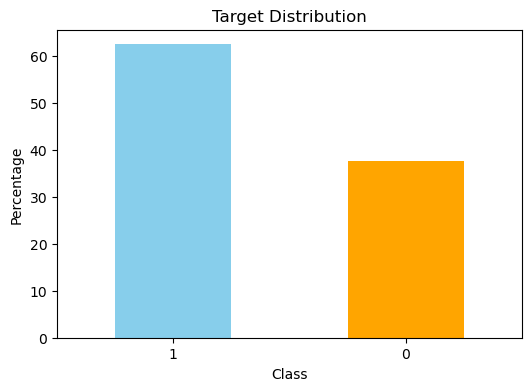

In [17]:
target_distribution.plot(kind='bar', color=['skyblue', 'orange'], figsize=(6, 4))
plt.title('Target Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

In [18]:
#unique values of the target variable
unique_values = df_train['DiagPeriodL90D'].unique()
print("Unique Values in Target:", unique_values)

Unique Values in Target: [1 0]


In [19]:
#data type of the target variable
print("Data Type of Target:", df_train['DiagPeriodL90D'].dtype)

Data Type of Target: int64


In [20]:
#unique values
value_counts = df_train['DiagPeriodL90D'].value_counts()
print(value_counts)

DiagPeriodL90D
1    8060
0    4846
Name: count, dtype: int64


In [21]:
#range, if numerical.
if pd.api.types.is_numeric_dtype(df_train['DiagPeriodL90D']):
    print("\nRange of Target (if numerical):")
    print(f"Min: {df_train['DiagPeriodL90D'].min()}, Max: {df_train['DiagPeriodL90D'].max()}")


Range of Target (if numerical):
Min: 0, Max: 1


compare features with targets

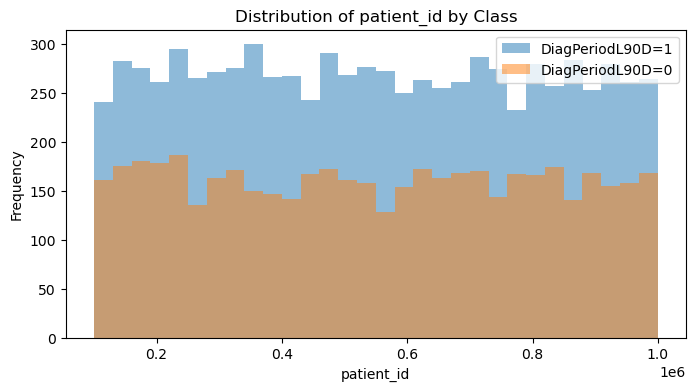

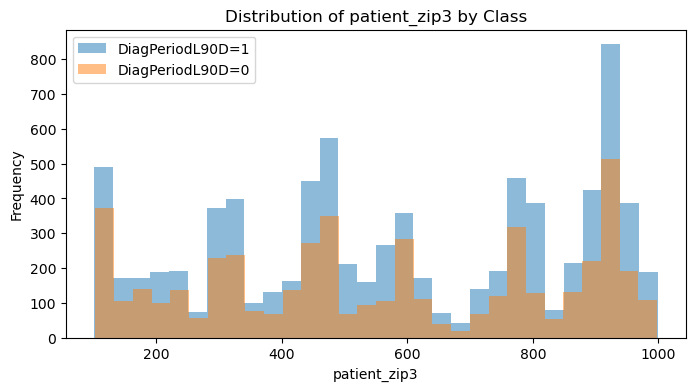

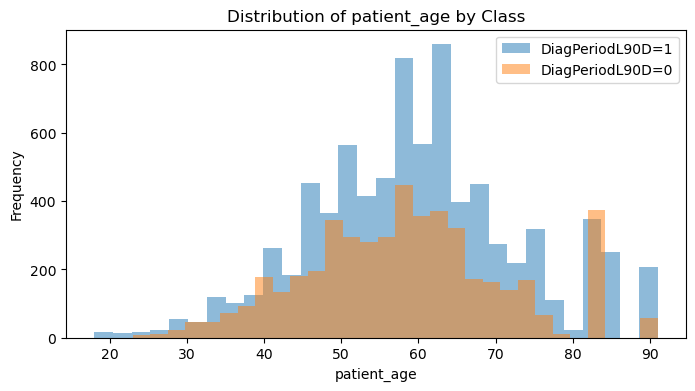

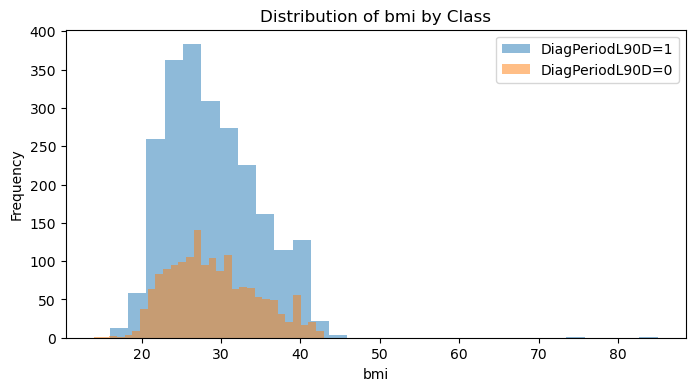

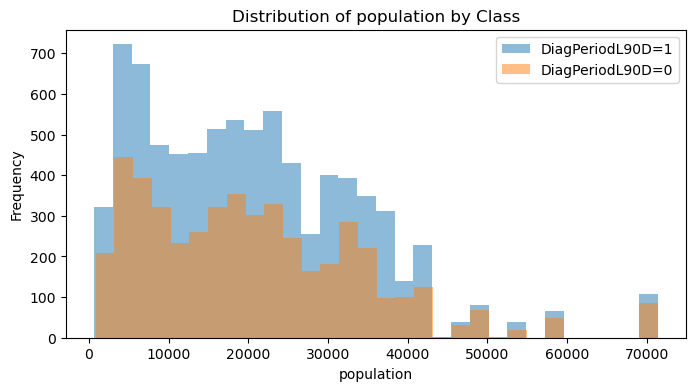

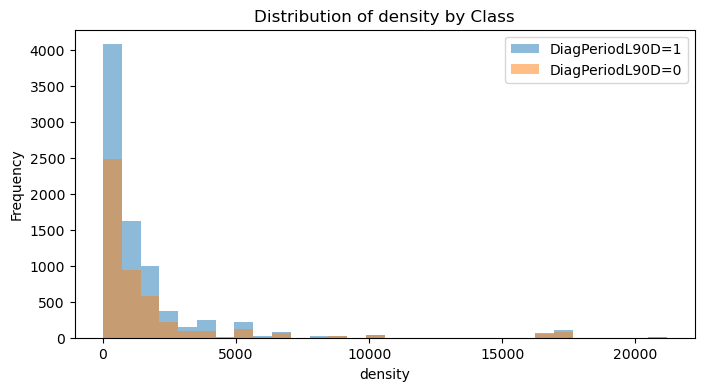

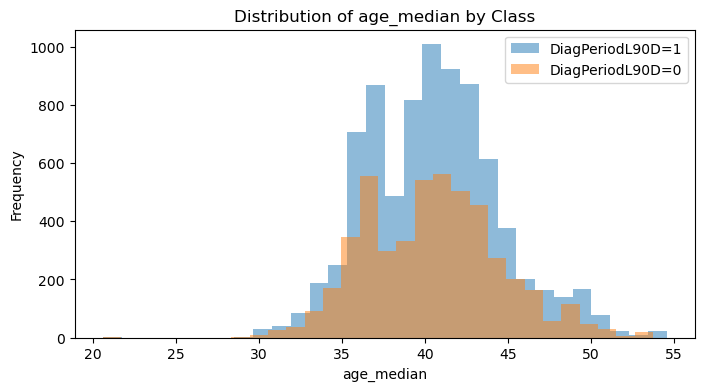

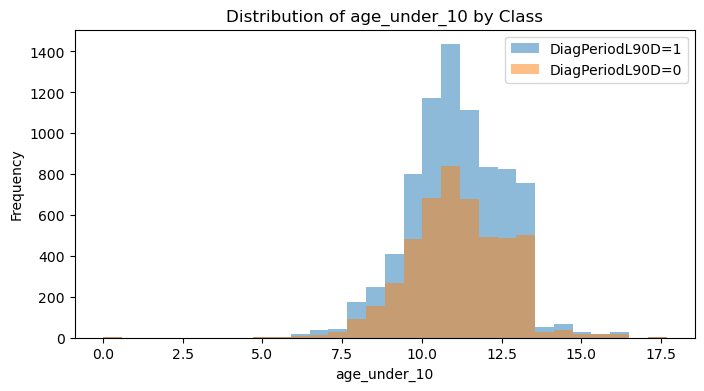

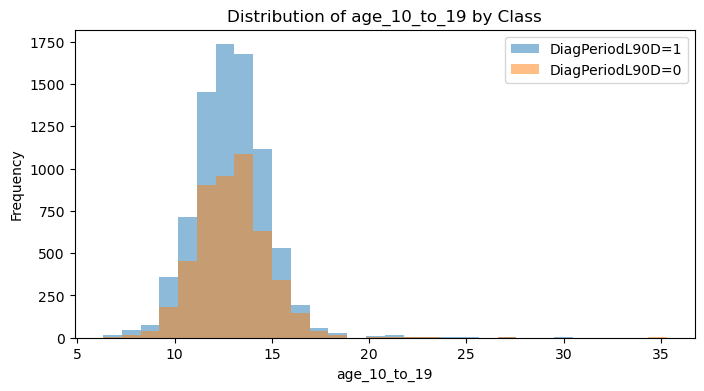

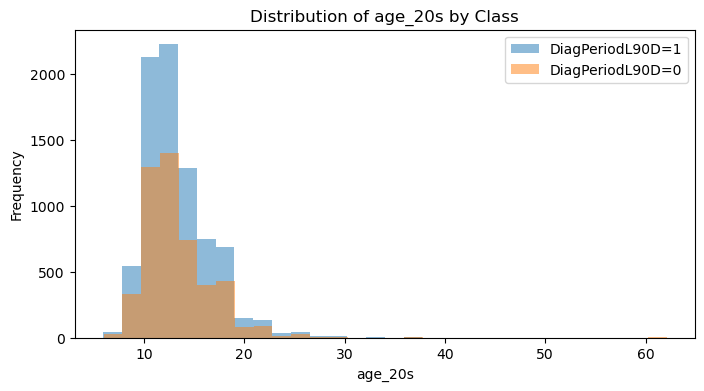

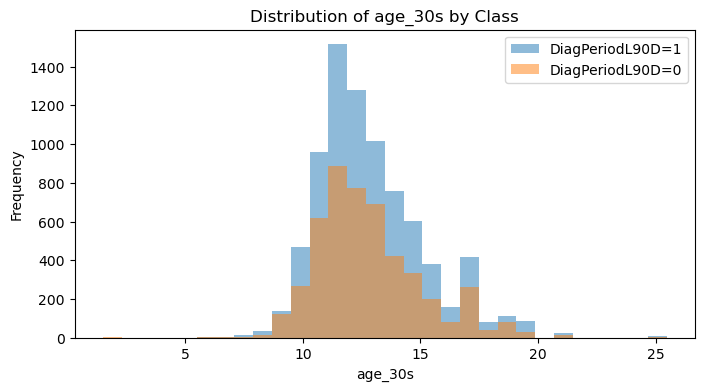

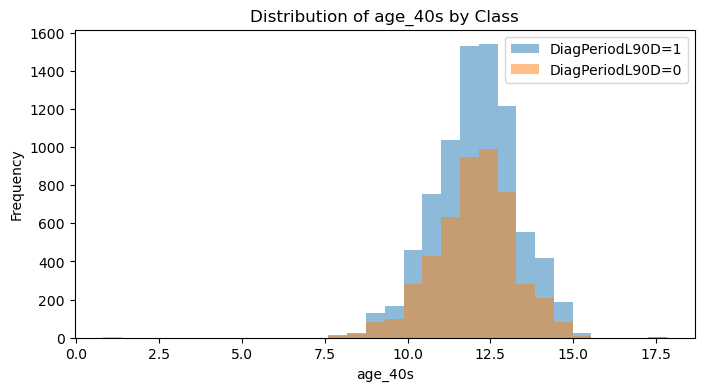

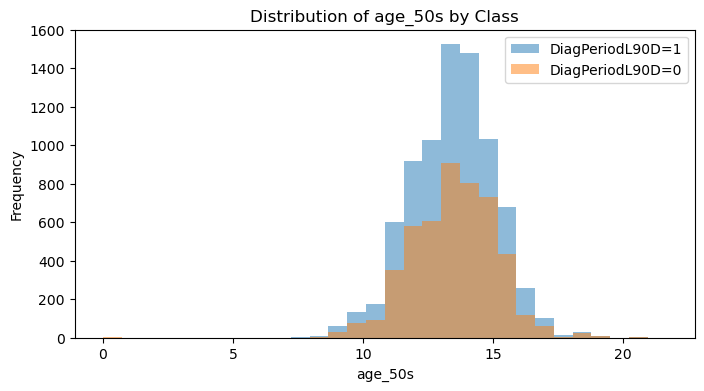

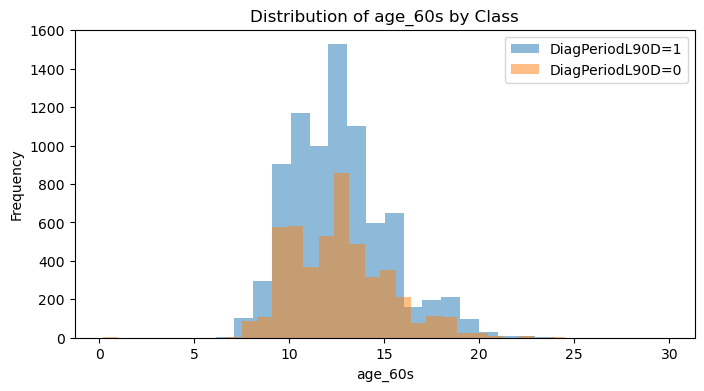

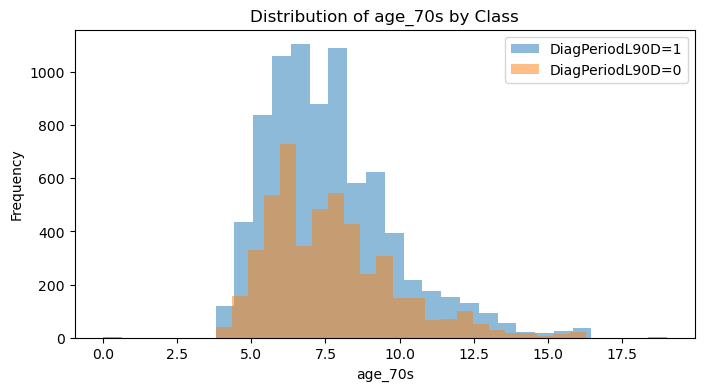

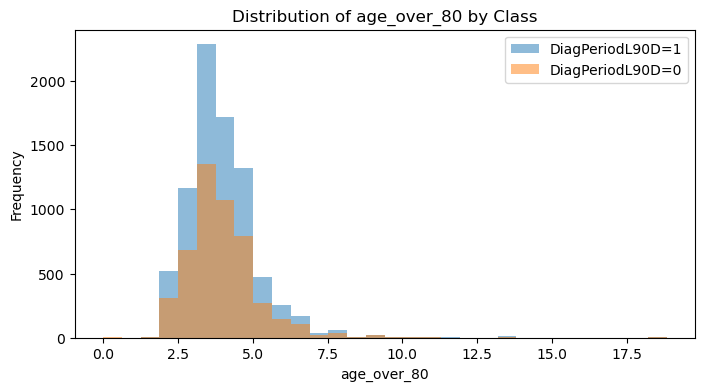

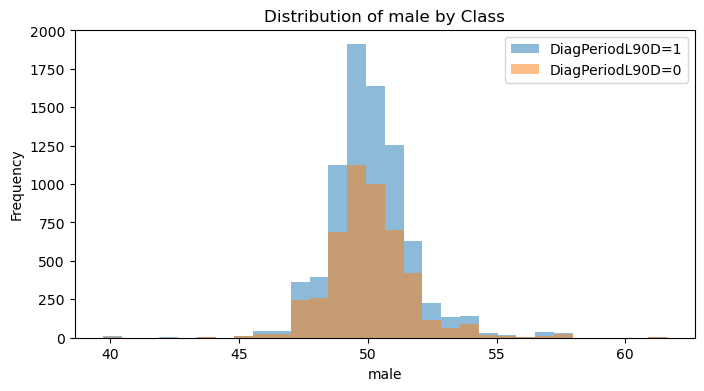

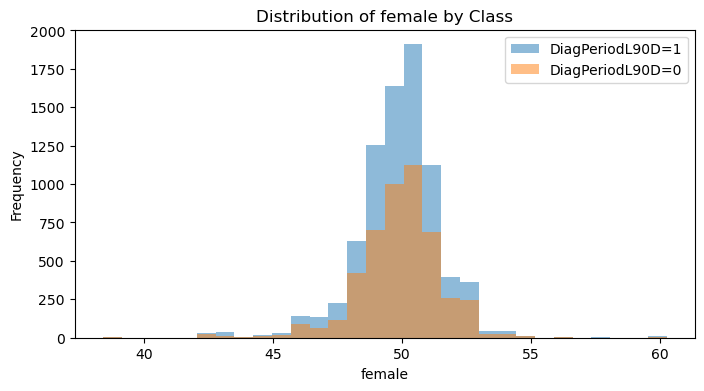

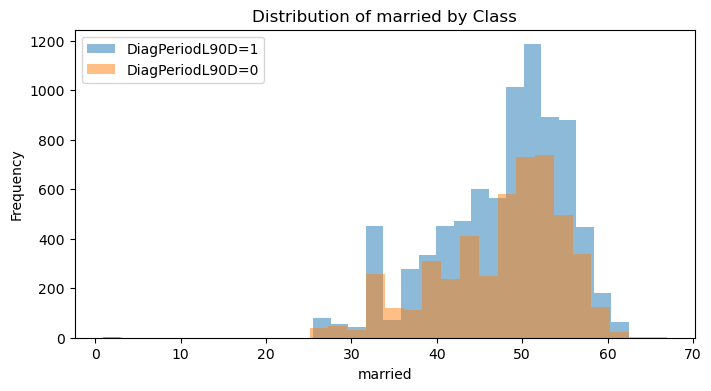

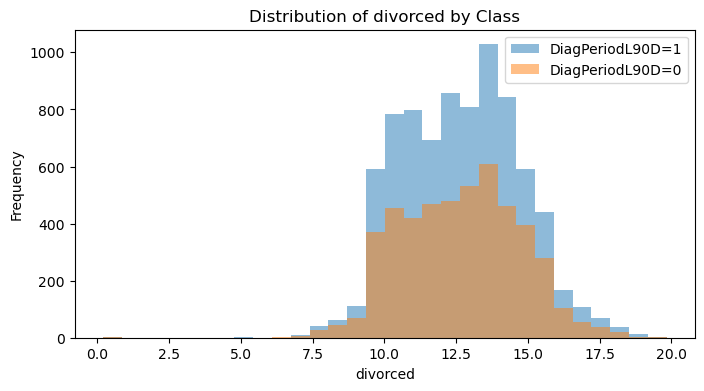

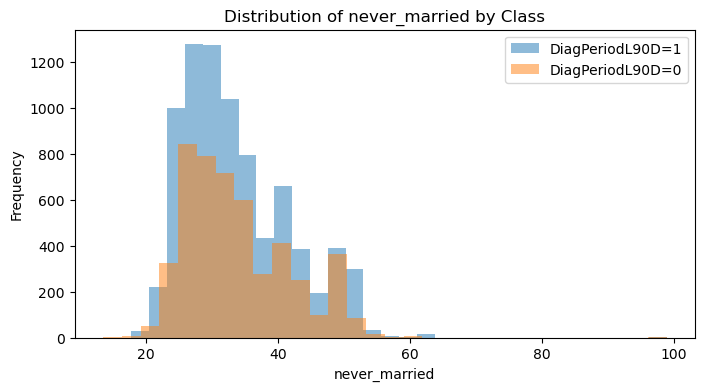

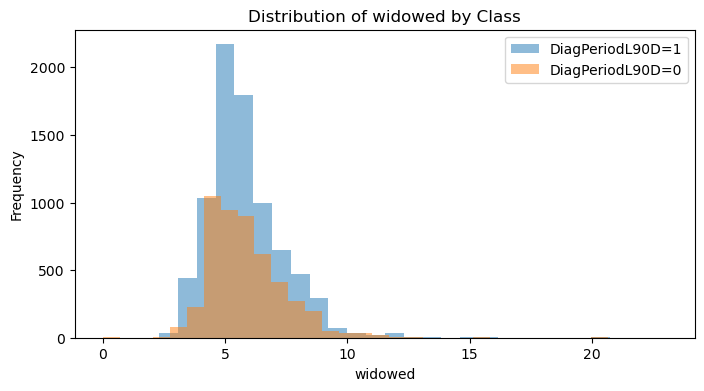

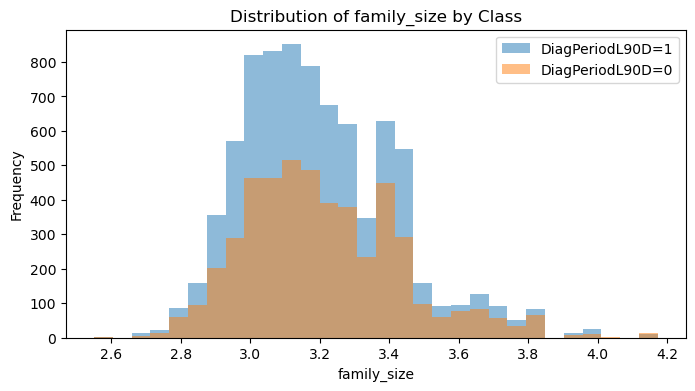

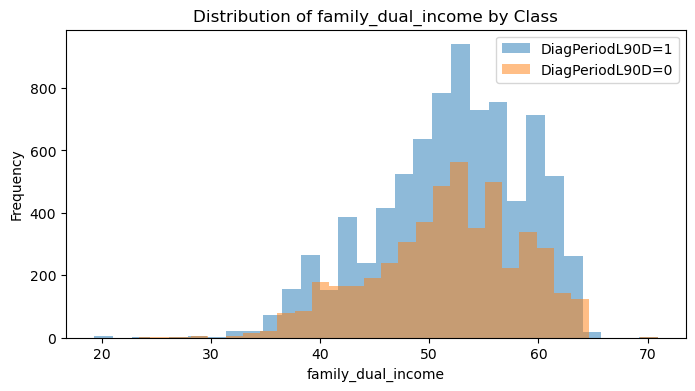

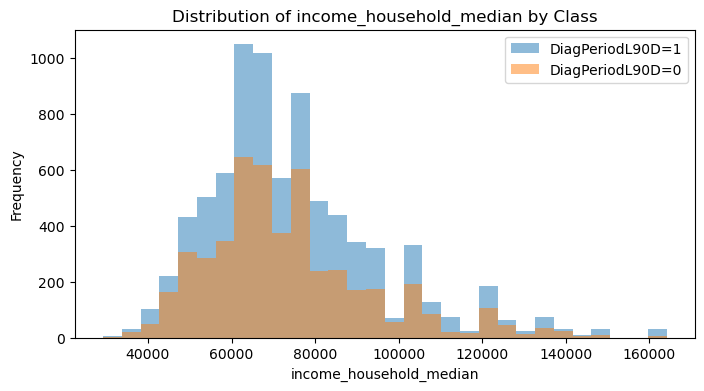

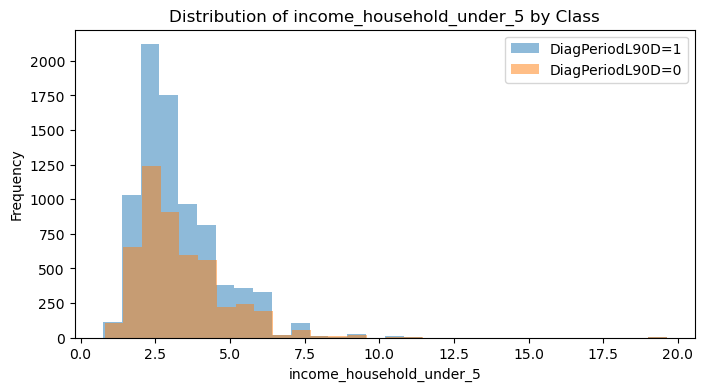

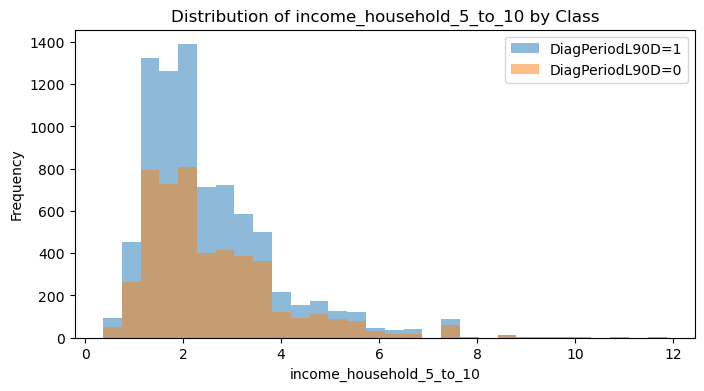

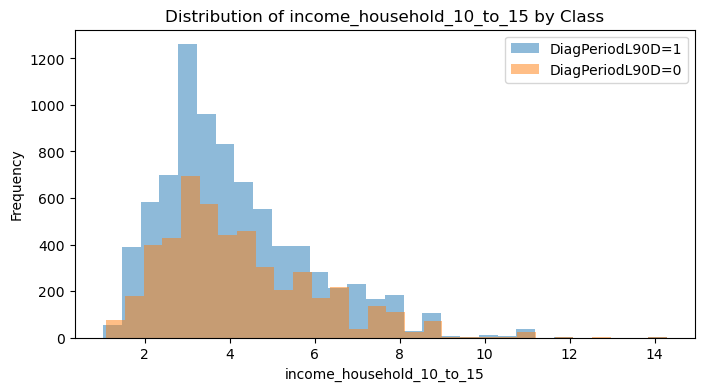

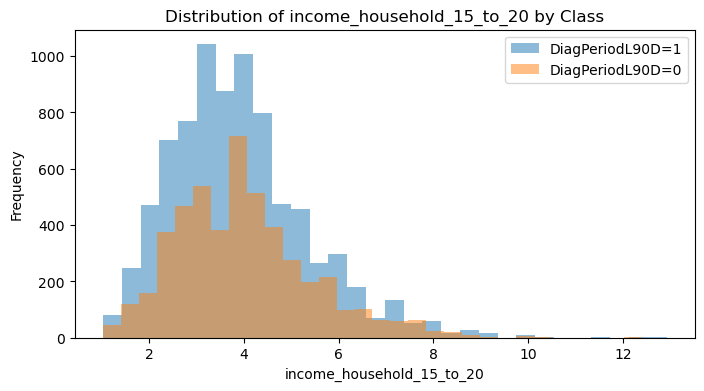

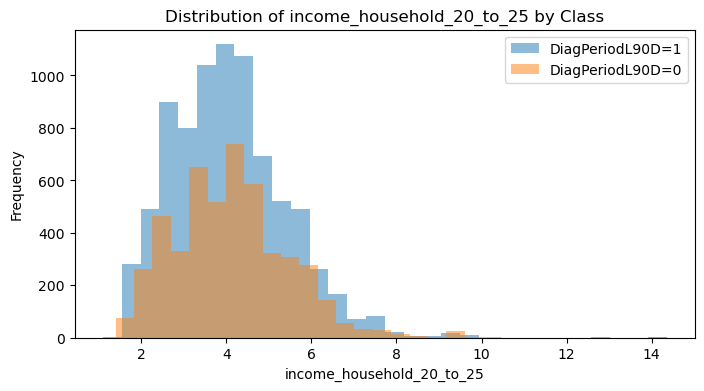

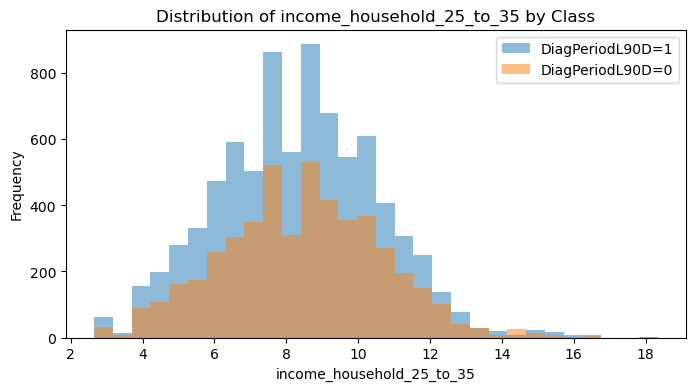

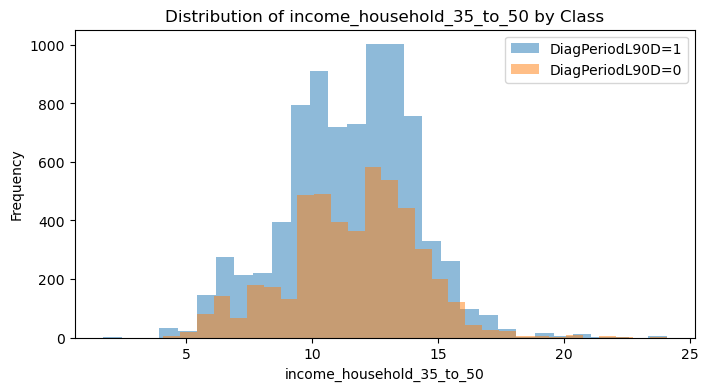

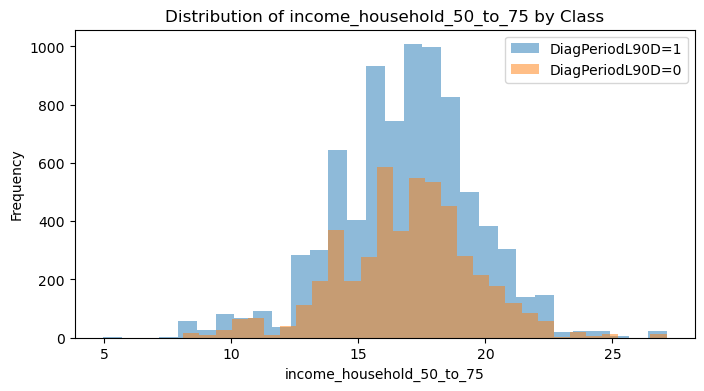

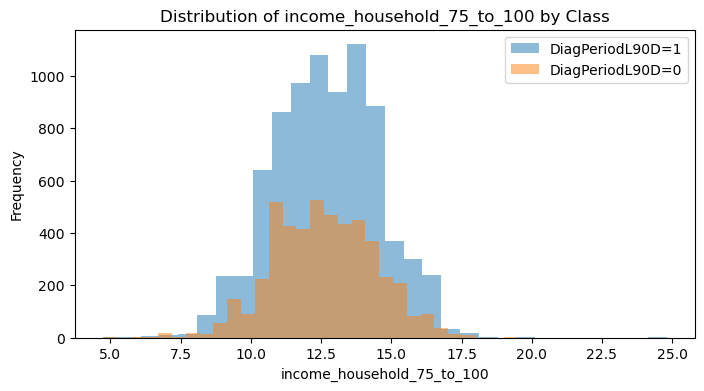

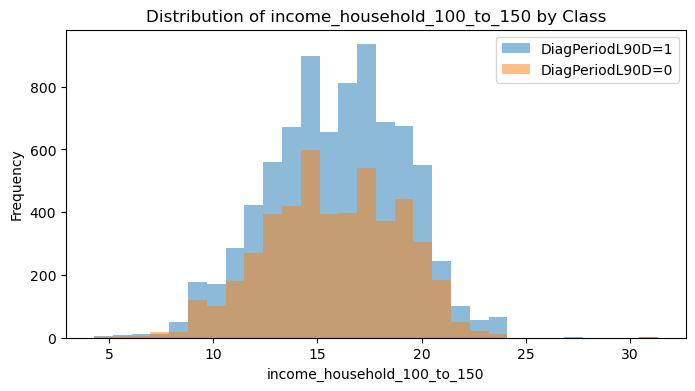

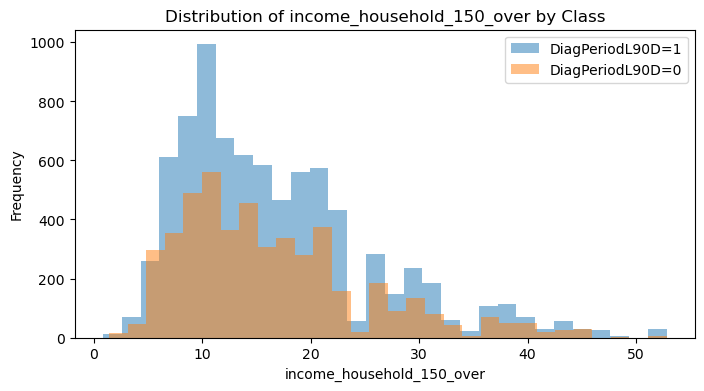

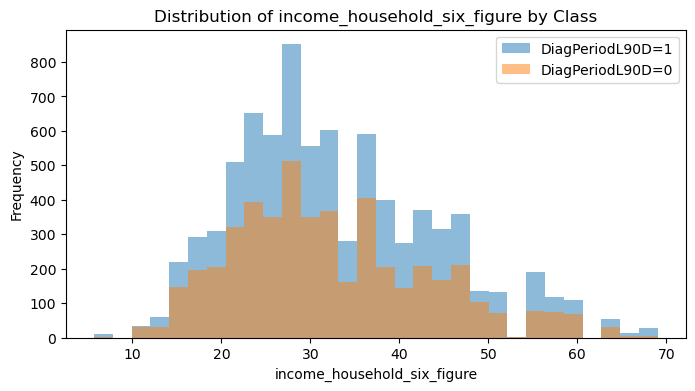

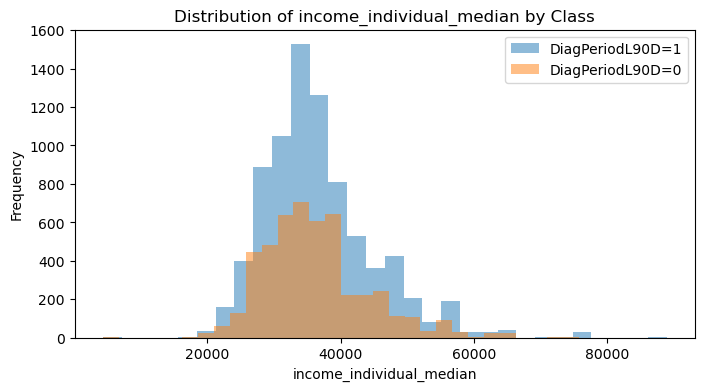

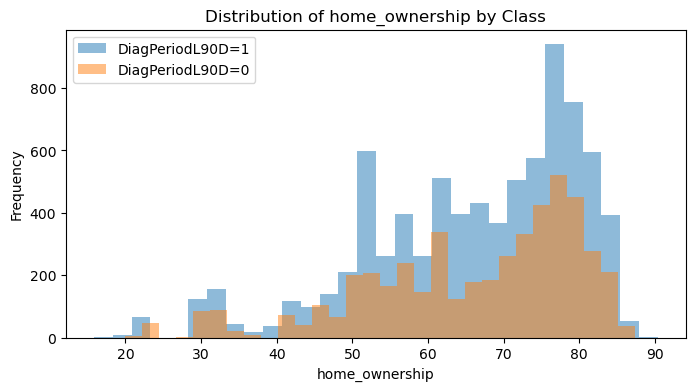

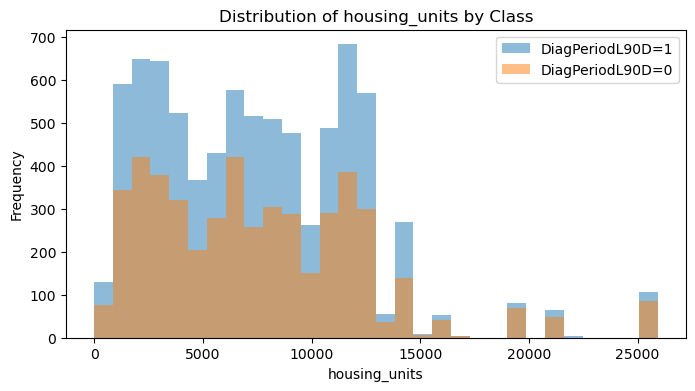

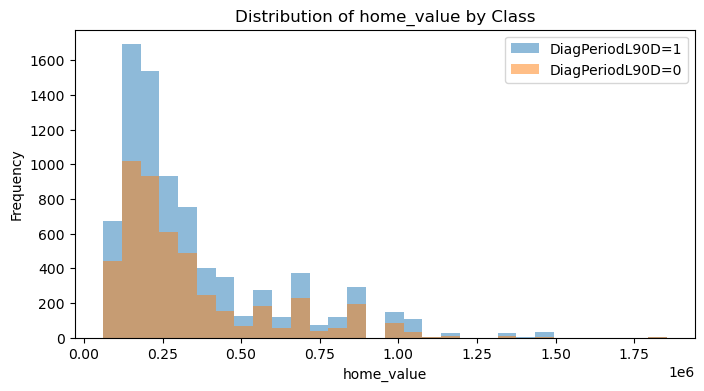

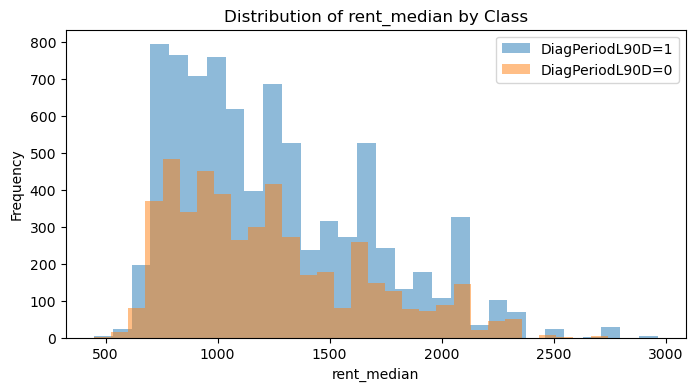

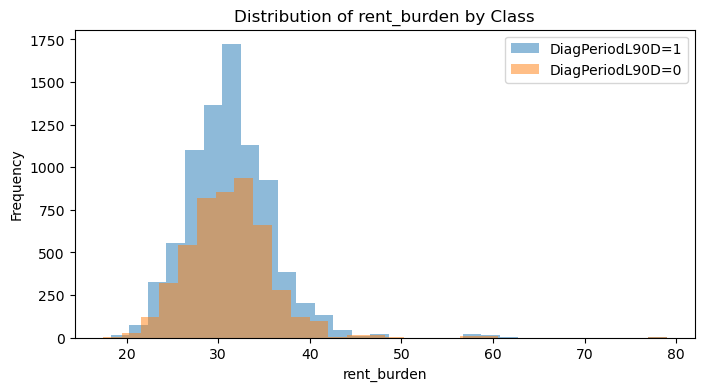

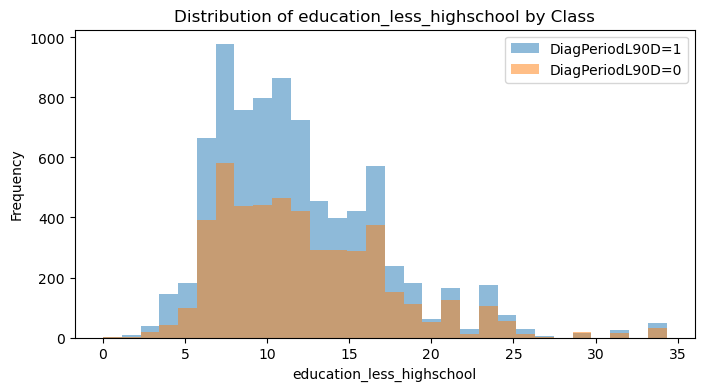

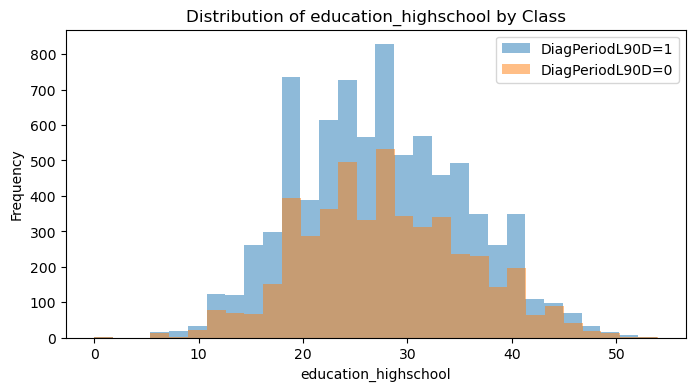

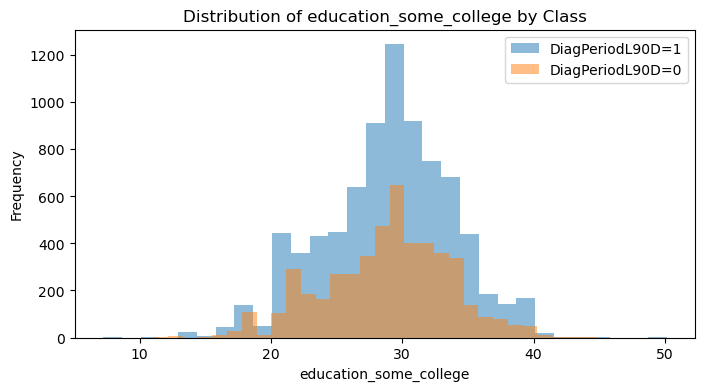

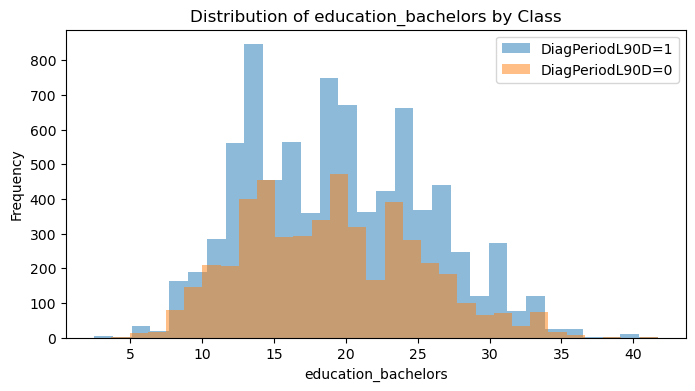

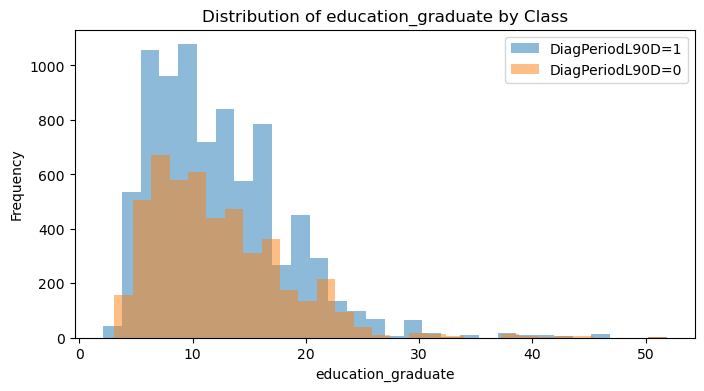

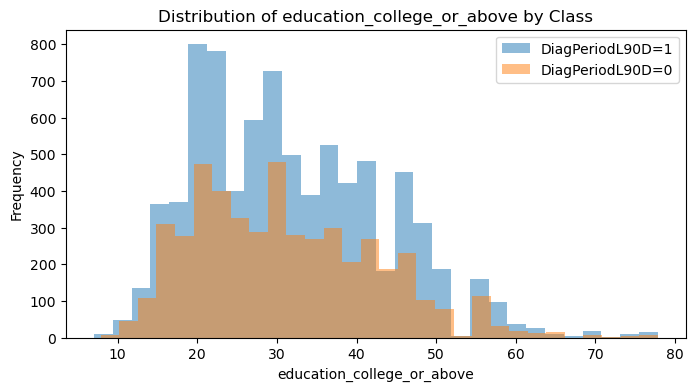

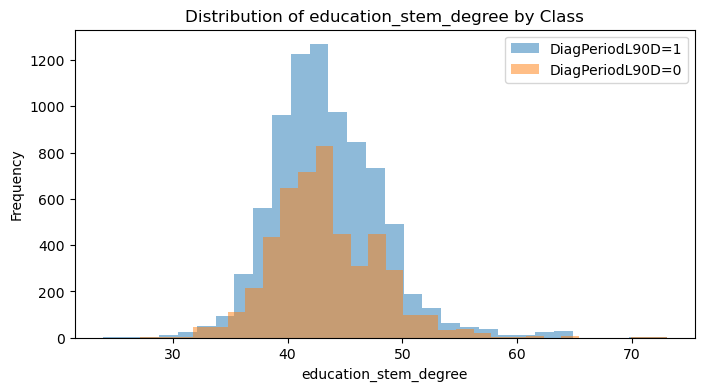

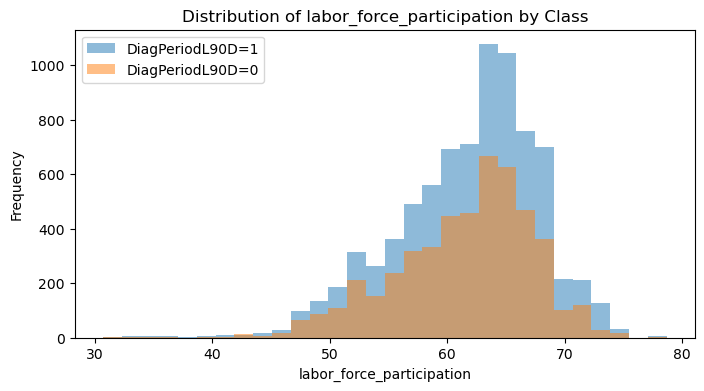

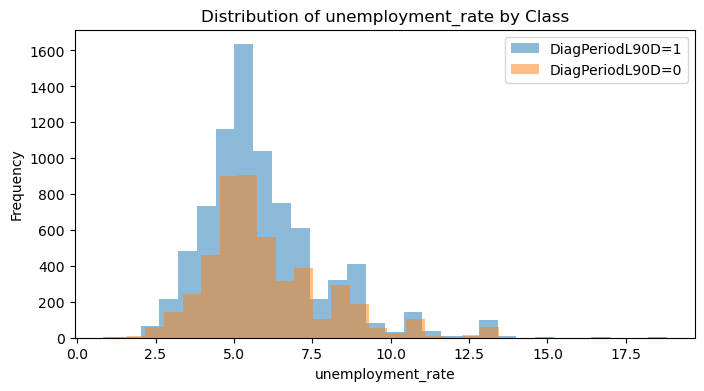

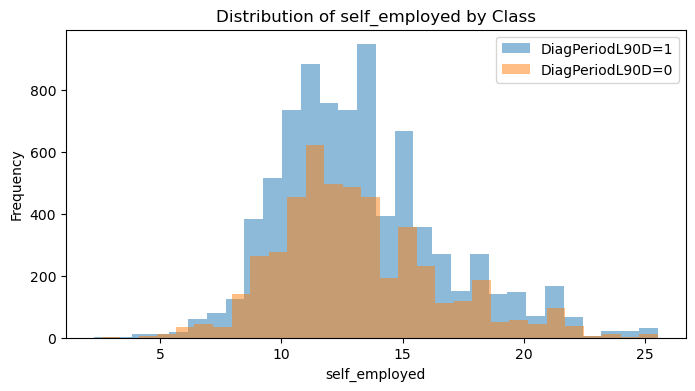

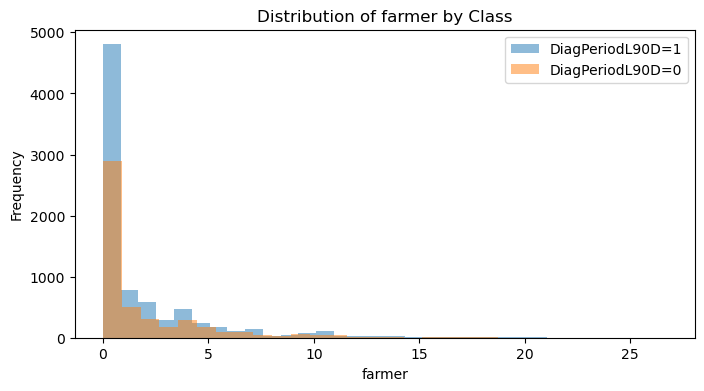

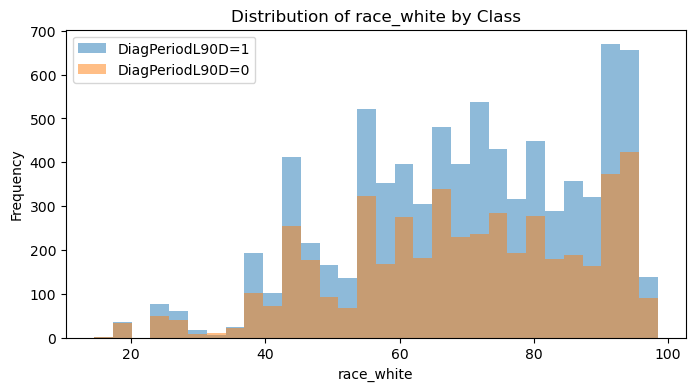

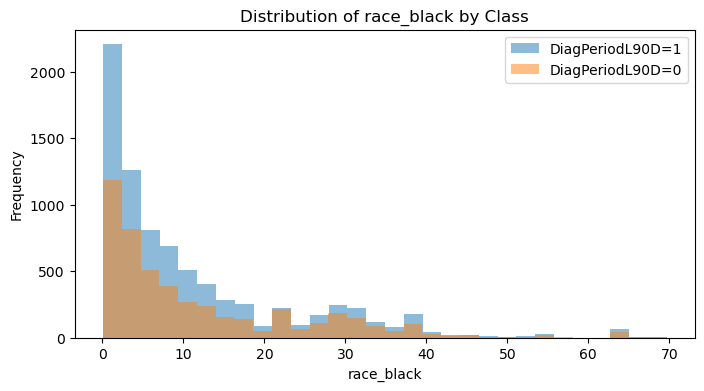

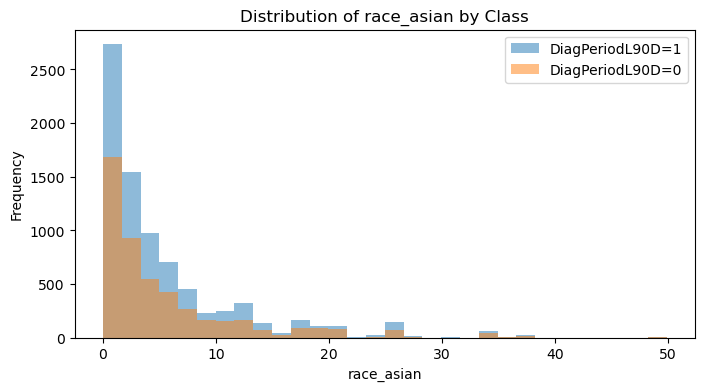

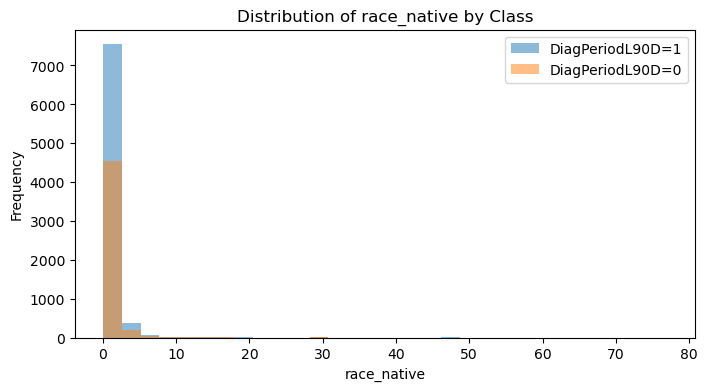

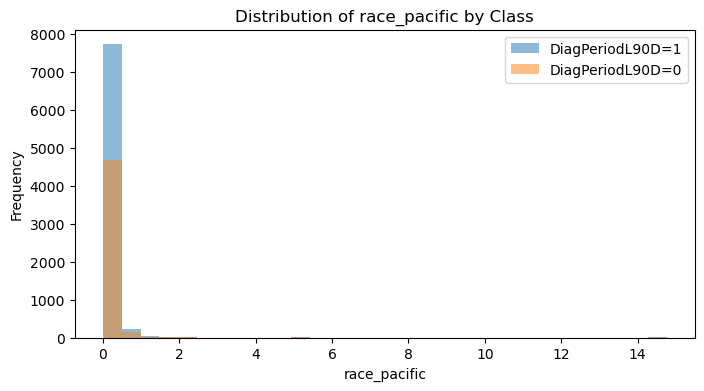

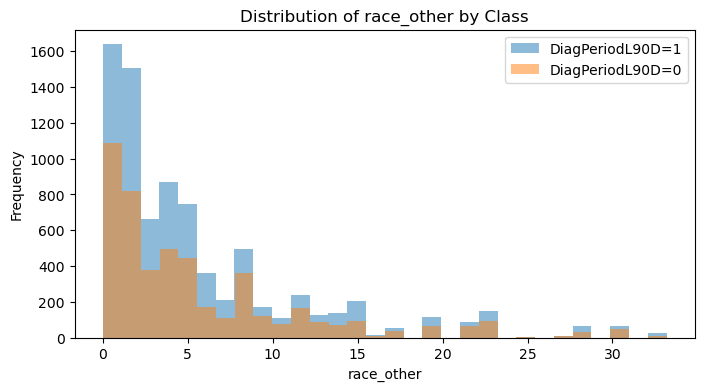

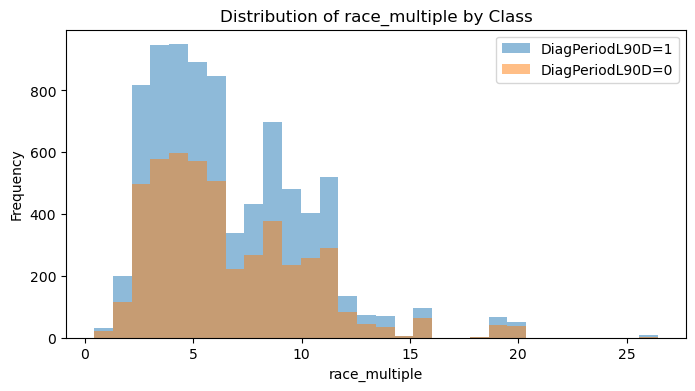

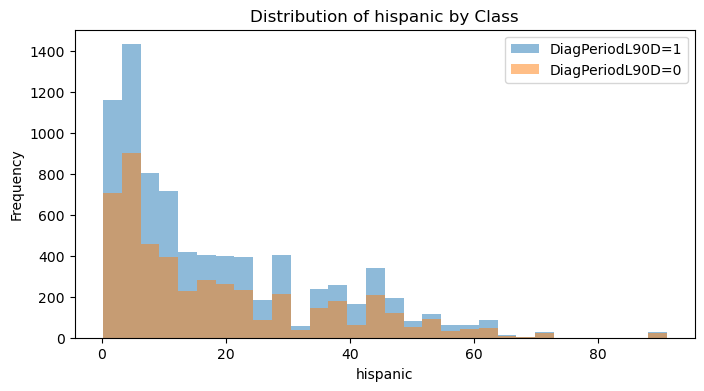

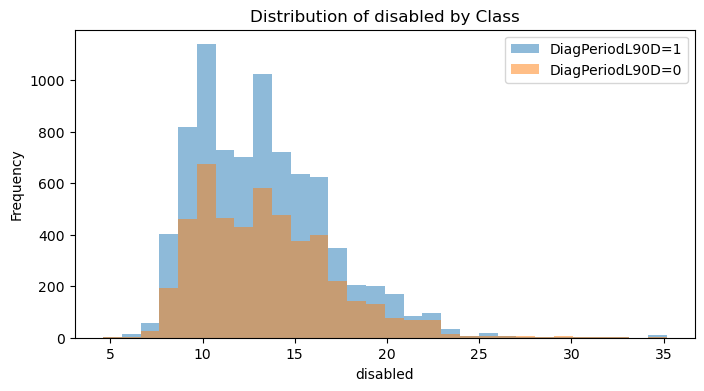

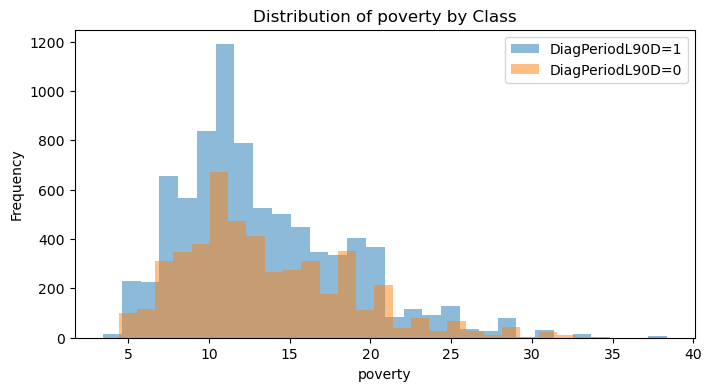

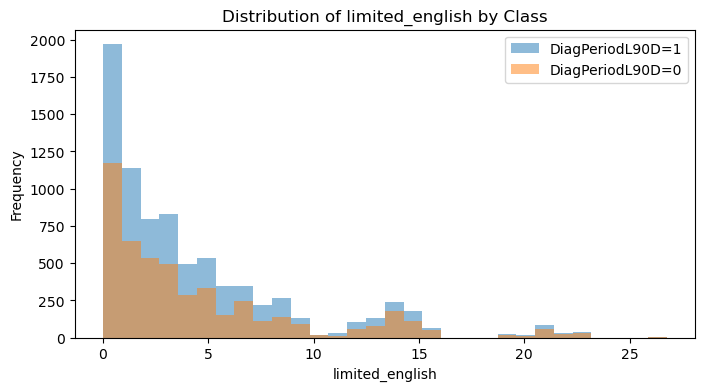

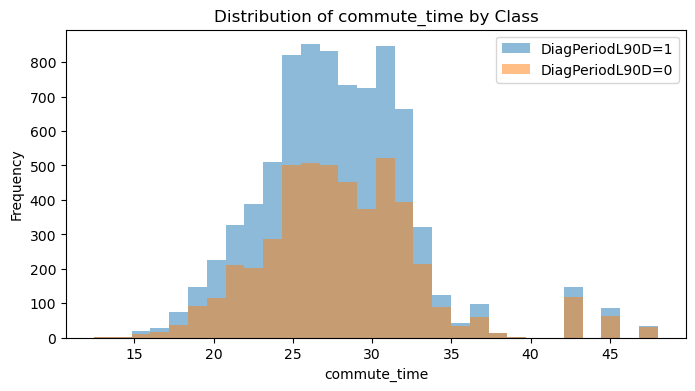

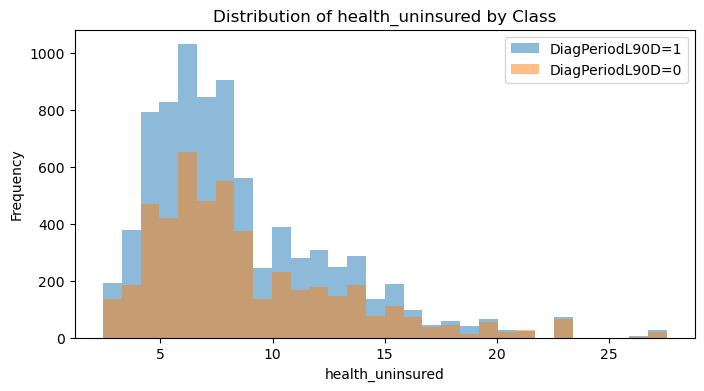

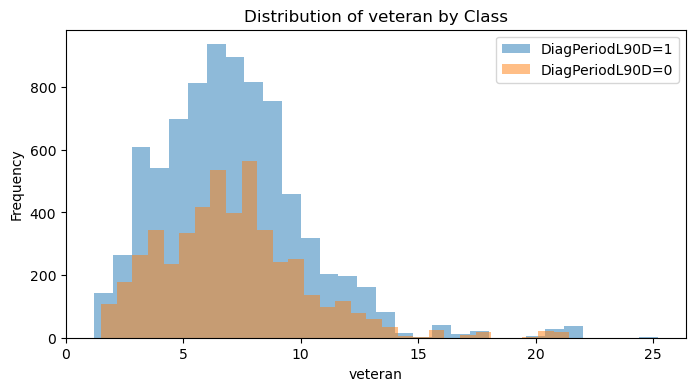

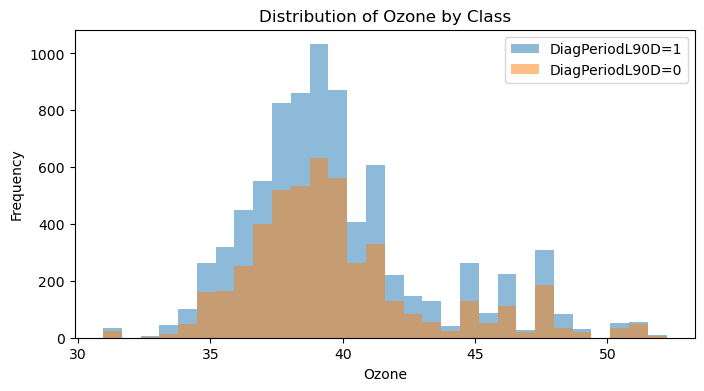

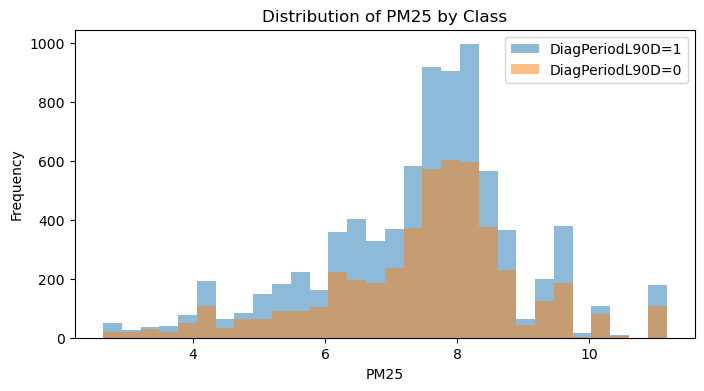

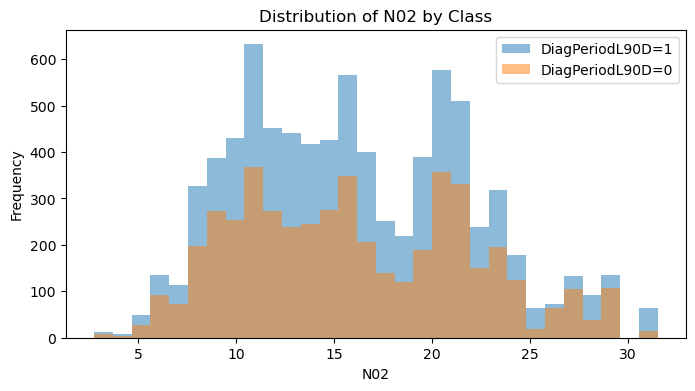

In [22]:
features = df_train.drop(columns=['DiagPeriodL90D'])
target = df_train['DiagPeriodL90D']

# Loop through all features to create histograms
for column in features.columns:
    if pd.api.types.is_numeric_dtype(features[column]):  # Only plot numeric features
        plt.figure(figsize=(8, 4))
        for label in target.unique():
            subset = features[target == label][column]
            plt.hist(subset, bins=30, alpha=0.5, label=f"DiagPeriodL90D={label}")
        
        plt.title(f"Distribution of {column} by Class")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()


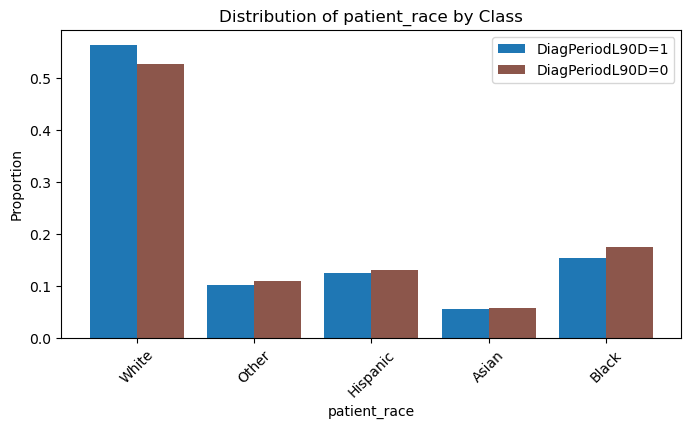

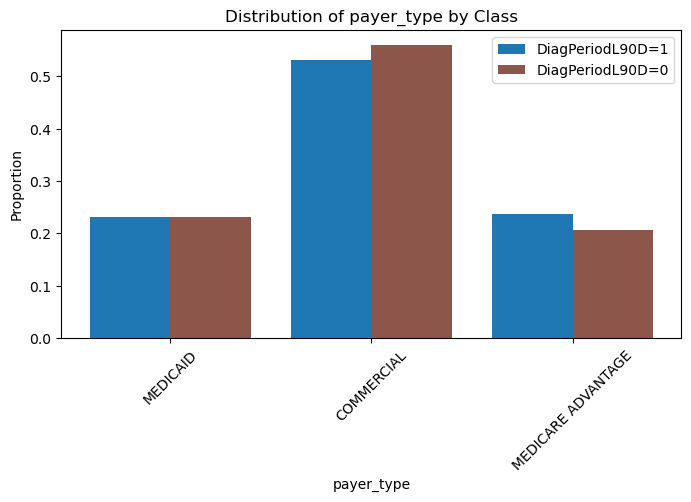

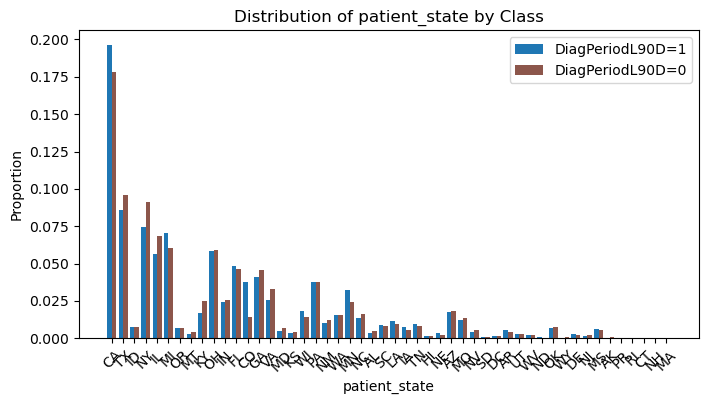

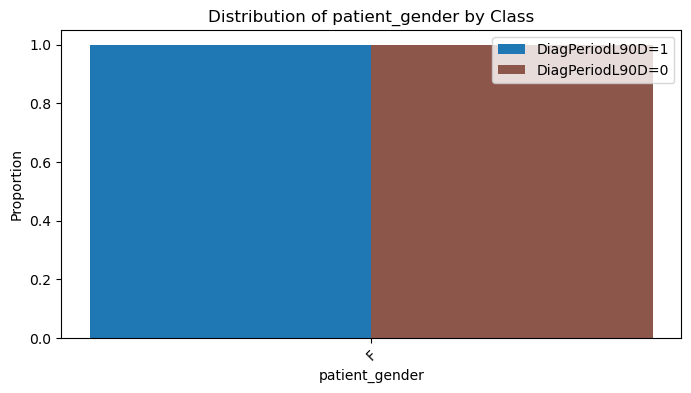

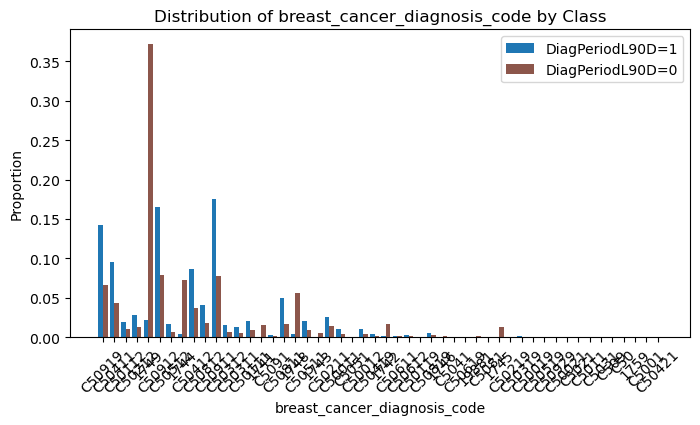

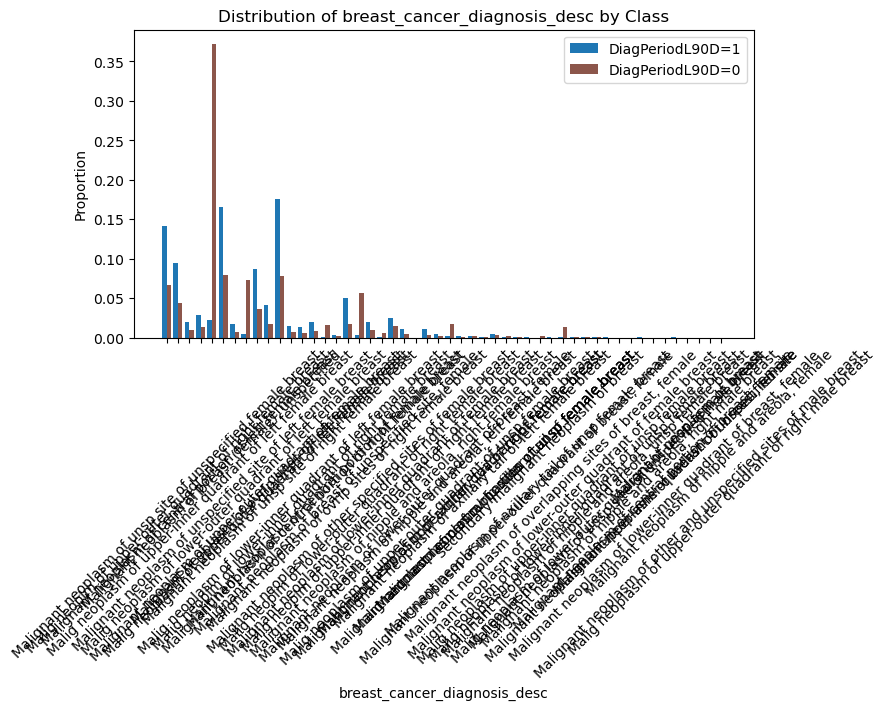

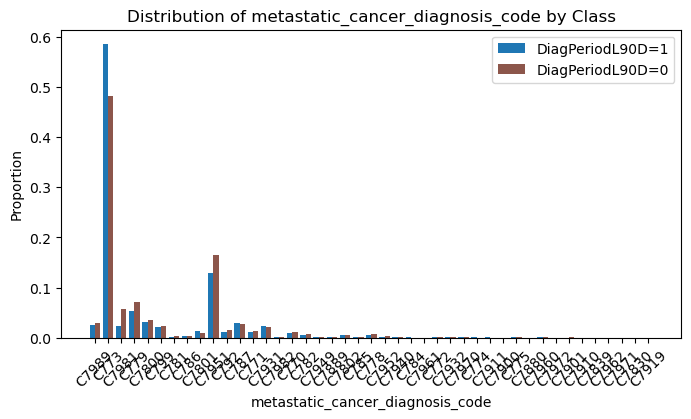

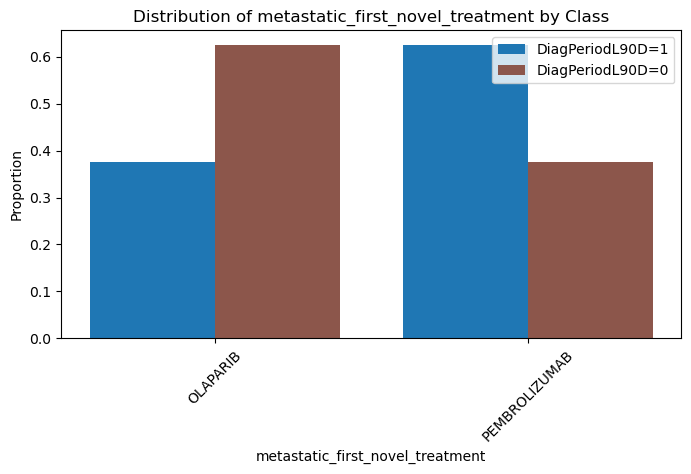

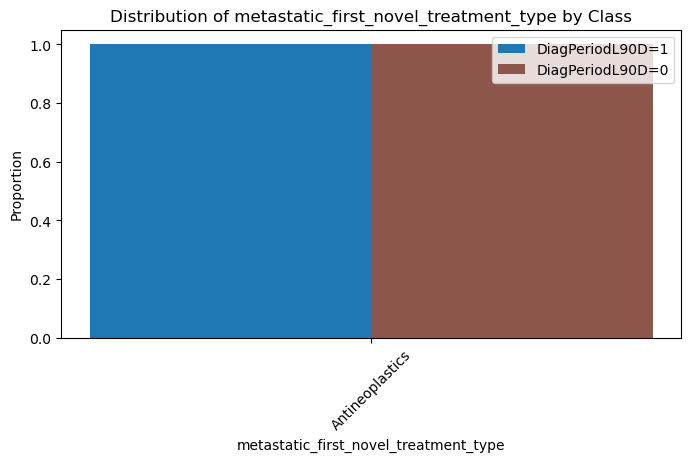

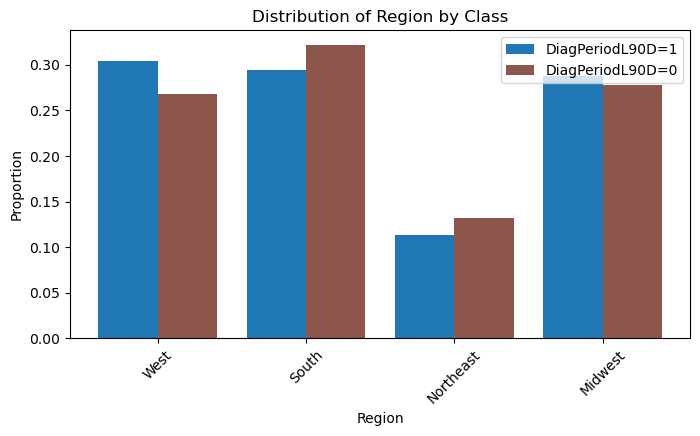

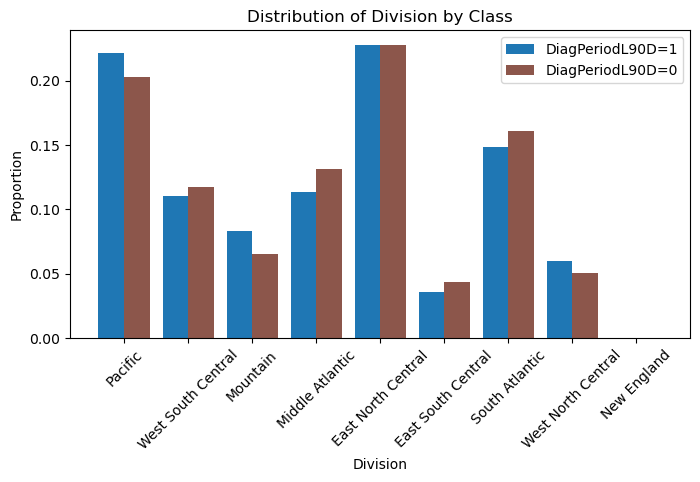

In [23]:
for column in features.columns:
    if isinstance(features[column].dtype, pd.CategoricalDtype) or features[column].dtype == 'object':  # Categorical features only
        plt.figure(figsize=(8, 4))
        bar_width = 0.4  # Adjust the width of the bars
        x_labels = features[column].dropna().unique()  # Unique categories
        
        for i, label in enumerate(target.unique()):  # Loop through classes
            subset = features[target == label][column].value_counts(normalize=True)
            subset = subset.reindex(x_labels, fill_value=0)  # Align with all possible categories
            
            x_positions = [x + (i * bar_width) for x in range(len(x_labels))]
            
            plt.bar(
                x_positions, 
                subset[x_labels], 
                width=bar_width, 
                label=f"DiagPeriodL90D={label}",
                color=plt.cm.tab10(i / len(target.unique()))  # Distinct colors
            )
        
        plt.title(f"Distribution of {column} by Class")
        plt.xlabel(column)
        plt.ylabel("Proportion")
        plt.xticks([x + bar_width / 2 for x in range(len(x_labels))], x_labels, rotation=45)
        plt.legend()
        plt.show()


In [24]:
categorical_summary = {}

# Loop through categorical features
for column in features.columns:
    if isinstance(features[column].dtype, pd.CategoricalDtype) or features[column].dtype == 'object':  # Categorical features only
        # Calculate proportions for each class
        class_distributions = {
            int(label): features[target == label][column].value_counts(normalize=True)
            for label in target.unique()
        }
        
        # Combine the distributions into a single DataFrame
        combined_distribution = pd.concat(
            class_distributions.values(), axis=1, keys=[f"DiagPeriodL90D={label}" for label in target.unique()]
        )
        categorical_summary[column] = combined_distribution.fillna(0)  # Fill missing values with 0

# Display each table for categorical features
for column, summary in categorical_summary.items():
    print(f"\nDistribution for Feature: {column}")
    print(summary)


Distribution for Feature: patient_race
              DiagPeriodL90D=1  DiagPeriodL90D=0
patient_race                                    
White                 0.563766          0.525795
Black                 0.154470          0.175408
Hispanic              0.124911          0.131126
Other                 0.102026          0.109630
Asian                 0.054827          0.058040

Distribution for Feature: payer_type
                    DiagPeriodL90D=1  DiagPeriodL90D=0
payer_type                                            
COMMERCIAL                  0.532194          0.560704
MEDICARE ADVANTAGE          0.236776          0.207368
MEDICAID                    0.231030          0.231928

Distribution for Feature: patient_state
               DiagPeriodL90D=1  DiagPeriodL90D=0
patient_state                                    
CA                     0.196362          0.178505
TX                     0.086095          0.096086
NY                     0.074632          0.091530
MI           

REMOVING REPETITIVE/UN NEEDED FEATURES

In [25]:
#remove region and division columns due to redudancy
columns_to_drop = [col for col in df_train.columns if 'Region' in col or 'Division' in col]
df_train = df_train.drop(columns=columns_to_drop, errors='ignore')
df_test = df_test.drop(columns=columns_to_drop, errors='ignore')

  

In [26]:
df_train.shape

(12906, 81)

In [27]:
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlations only for numerical columns
correlations = df_train[numerical_columns].corr()

# Identify columns with weak correlation to the target
weak_corr_columns = correlations['DiagPeriodL90D'][abs(correlations['DiagPeriodL90D']) < 0.1].index.tolist()

In [28]:
weak_corr_columns

['patient_id',
 'patient_zip3',
 'patient_age',
 'bmi',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate',
 'education_college_or_above',
 '

In [29]:
df_train.shape

(12906, 81)

In [30]:
#drop patiend id as it has no effect on prediction
df_train.drop(columns='patient_id', inplace=True)

In [32]:
columns_to_drop = [col for col in df_train.columns if col.startswith('age') and col != 'age_median']

df_train = df_train.drop(columns=columns_to_drop, errors='ignore')
df_test = df_test.drop(columns=columns_to_drop, errors='ignore')

print("Dropped columns:", columns_to_drop)

Dropped columns: ['age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80']


In [33]:
#completely irrelevant columns
df_train.drop(columns='commute_time', inplace=True)
df_test.drop(columns='commute_time', inplace=True)

In [34]:
columns_to_drop = [col for col in df_train.columns if col.startswith('income_household') and col != 'income_household_median']
df_train = df_train.drop(columns=columns_to_drop, errors='ignore')
df_test = df_test.drop(columns=columns_to_drop, errors='ignore')

print("Dropped columns:", columns_to_drop)

Dropped columns: ['income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure']


In [35]:
#redudant, just need one of male or female percentages
df_train = df_train.drop(columns=['female'], errors='ignore')
df_test = df_test.drop(columns=['female'], errors='ignore')

In [36]:
df_train.shape

(12906, 57)

In [37]:
# checking if we need education columns
education_columns = [col for col in df_train.columns if 'education' in col]
correlations = df_train[education_columns + ['DiagPeriodL90D']].corr()
print(correlations['DiagPeriodL90D'].sort_values(ascending=False))


DiagPeriodL90D                1.000000
education_bachelors           0.037704
education_college_or_above    0.029082
education_graduate            0.017765
education_stem_degree         0.016777
education_some_college        0.012397
education_highschool         -0.026750
education_less_highschool    -0.035954
Name: DiagPeriodL90D, dtype: float64


In [38]:
# Drop all education columns
education_columns = [col for col in df_train.columns if 'education' in col and col!= 'education_college_or_above']

# Remove from train and test datasets
df_train = df_train.drop(columns=education_columns, errors='ignore')
df_test = df_test.drop(columns=education_columns, errors='ignore')


In [39]:
columns_to_drop = [
    'family_size', 'family_dual_income', 'home_ownership', 'housing_units',
    'home_value', 'rent_burden'
]

# Drop columns from train and test datasets
df_train = df_train.drop(columns=columns_to_drop, errors='ignore')
df_test = df_test.drop(columns=columns_to_drop, errors='ignore')


In [40]:
print(df_train.isnull().sum())

patient_race                              6385
payer_type                                1803
patient_state                               51
patient_zip3                                 0
patient_age                                  0
patient_gender                               0
bmi                                       8965
breast_cancer_diagnosis_code                 0
breast_cancer_diagnosis_desc                 0
metastatic_cancer_diagnosis_code             0
metastatic_first_novel_treatment         12882
metastatic_first_novel_treatment_type    12882
population                                   1
density                                      1
age_median                                   1
male                                         1
married                                      1
divorced                                     1
never_married                                1
widowed                                      1
income_household_median                      4
income_indivi

In [41]:
#too much missing data to use for predictions
columns_to_drop = ['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']
df_train = df_train.drop(columns=columns_to_drop, errors='ignore')
df_test = df_test.drop(columns=columns_to_drop, errors='ignore')

In [42]:
'''#handling missing values of patient race by using population percenteges
race_columns = ['race_white', 'race_black', 'race_asian', 'race_native', 
                'race_pacific', 'race_other', 'race_multiple']
def assign_race(row):
    if row[race_columns].isnull().all():  # Handle missing values
        return 'Unknown'
    return row[race_columns].idxmax().replace('race_', '')  # Find race with max percentage

df_train['patient_race'] = df_train.apply(assign_race, axis=1)
df_test['patient_race'] = df_test.apply(assign_race, axis=1)

# Verify results
print(df_train['patient_race'].value_counts())  # Check distribution
print(df_train['patient_race'].isnull().sum())  # Verify no missing values
'''

"#handling missing values of patient race by using population percenteges\nrace_columns = ['race_white', 'race_black', 'race_asian', 'race_native', \n                'race_pacific', 'race_other', 'race_multiple']\ndef assign_race(row):\n    if row[race_columns].isnull().all():  # Handle missing values\n        return 'Unknown'\n    return row[race_columns].idxmax().replace('race_', '')  # Find race with max percentage\n\ndf_train['patient_race'] = df_train.apply(assign_race, axis=1)\ndf_test['patient_race'] = df_test.apply(assign_race, axis=1)\n\n# Verify results\nprint(df_train['patient_race'].value_counts())  # Check distribution\nprint(df_train['patient_race'].isnull().sum())  # Verify no missing values\n"

In [45]:
#not valid approach so trying a different method. most people were white so the data would have become imbalanced
race_columns = ['race_white', 'race_black', 'race_asian', 'race_native', 
                'race_pacific', 'race_other', 'race_multiple']

# Function to assign patient_race proportionally
def assign_race_proportionally(row):
    # Get the sum of the percentages for normalization
    total_percentage = row[race_columns].sum()
    
    # Handle cases where all percentages are missing or zero
    if total_percentage == 0 or row[race_columns].isnull().all():
        return 'Unknown'
    
    # Normalize percentages to sum to 1
    probabilities = row[race_columns].fillna(0) / total_percentage
    
    # Choose race based on normalized probabilities
    return np.random.choice(probabilities.index, p=probabilities.values).replace('race_', '')

# Apply to train and test datasets
df_train['patient_race'] = df_train.apply(assign_race_proportionally, axis=1)
df_test['patient_race'] = df_test.apply(assign_race_proportionally, axis=1)

# Verify results
print(df_train['patient_race'].value_counts())
print(df_train['patient_race'].isnull().sum())


patient_race
white       8992
black       1466
multiple     859
other        731
asian        722
native       118
pacific       17
Unknown        1
Name: count, dtype: int64
0


In [46]:
print(df_train[['bmi', 'DiagPeriodL90D']].corr())

                    bmi  DiagPeriodL90D
bmi             1.00000        -0.00571
DiagPeriodL90D -0.00571         1.00000


In [47]:
#more than 50% of bmi is missing, and there isn't any correlation so i will drop
df_train = df_train.drop(columns=['bmi'], errors='ignore')
df_test = df_test.drop(columns=['bmi'], errors='ignore')

In [48]:
# impute payer missing values with unknown to avoid assumptions
df_train['payer_type'] = df_train['payer_type'].fillna('Unknown')
df_test['payer_type'] = df_test['payer_type'].fillna('Unknown')


In [51]:
#only 29 out of 12k are missing so we can afford to remove those
# Drop rows with missing environmental data
df_train = df_train.dropna(subset=['Ozone', 'PM25', 'N02'])
df_test = df_test.dropna(subset=['Ozone', 'PM25', 'N02'])

In [53]:
#for rest of missing values, dropping them since they are relatively alot less
df_train = df_train.dropna()
df_test = df_test.dropna()

In [54]:
print(df_train.isnull().sum())

patient_race                        0
payer_type                          0
patient_state                       0
patient_zip3                        0
patient_age                         0
patient_gender                      0
breast_cancer_diagnosis_code        0
breast_cancer_diagnosis_desc        0
metastatic_cancer_diagnosis_code    0
population                          0
density                             0
age_median                          0
male                                0
married                             0
divorced                            0
never_married                       0
widowed                             0
income_household_median             0
income_individual_median            0
rent_median                         0
education_college_or_above          0
labor_force_participation           0
unemployment_rate                   0
self_employed                       0
farmer                              0
race_white                          0
race_black  

In [55]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [56]:
df_train.shape

(12754, 42)

In [57]:
df_test.shape

(5747, 41)

In [58]:
categorical_features = df_train.select_dtypes(include='object').columns
print(categorical_features)

Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code'],
      dtype='object')


In [60]:
# checking if i should use label or onehot encoding
num_unique_codes = df_train['breast_cancer_diagnosis_code'].nunique()
num_unique_desc = df_train['breast_cancer_diagnosis_desc'].nunique()
meta_num_unique_codes = df_train['metastatic_cancer_diagnosis_code'].nunique()

print(f"Number of unique codes: {num_unique_codes}")
print(f"Number of meta unique codes: {meta_num_unique_codes}")
print(f"Number of unique descriptions: {num_unique_desc}")

Number of unique codes: 50
Number of meta unique codes: 43
Number of unique descriptions: 50


In [64]:
#we will do label encoding to avoid the many extra cols
from sklearn.preprocessing import LabelEncoder

# Combine unique values from train and test for encoding
columns_to_encode = ['breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code']

# Initialize LabelEncoders for each column
encoders = {}

for col in columns_to_encode:
    # Ensure all values are strings
    df_train[col] = df_train[col].astype(str)
    df_test[col] = df_test[col].astype(str)
    
    # Combine unique values from train and test
    unique_values = pd.concat([df_train[col], df_test[col]]).unique()
    
    # Create and fit LabelEncoder
    le = LabelEncoder()
    le.fit(unique_values)
    
    # Apply encoding to train and test datasets
    df_train[col] = le.transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
    
    # Store the encoder for future reference
    encoders[col] = le

# Verify the encoded results
print("Encoded Train Head:")
print(df_train[columns_to_encode].head())

print("\nEncoded Test Head:")
print(df_test[columns_to_encode].head())



Encoded Train Head:
   breast_cancer_diagnosis_code  breast_cancer_diagnosis_desc  \
0                            52                            42   
1                            31                            12   
2                            18                            23   
3                            24                             4   
4                            56                            18   

   metastatic_cancer_diagnosis_code  
0                                41  
1                                 3  
2                                 3  
3                                 3  
4                                 3  

Encoded Test Head:
   breast_cancer_diagnosis_code  breast_cancer_diagnosis_desc  \
0                            75                             6   
1                            91                            44   
2                            90                            41   
3                            91                            44   
4               

In [65]:
print(encoders['breast_cancer_diagnosis_code'].classes_)


['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '1741' '1742' '1743'
 '1744' '1745' '1746' '1748' '1749' '18' '19' '19881' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35' '36'
 '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49' '5'
 '6' '7' '8' '9' 'C50011' 'C50012' 'C50019' 'C50111' 'C50112' 'C50119'
 'C5021' 'C50211' 'C50212' 'C50219' 'C5031' 'C50311' 'C50312' 'C50319'
 'C5041' 'C50411' 'C50412' 'C50419' 'C50421' 'C50511' 'C50512' 'C50519'
 'C50611' 'C50612' 'C50619' 'C5081' 'C50811' 'C50812' 'C50819' 'C509'
 'C5091' 'C50911' 'C50912' 'C50919' 'C50921' 'C50922' 'C50929']


In [66]:
df_train.head()

patient_race  payer_type patient_state  patient_zip3  patient_age  \
0        other    MEDICAID            CA           924           84   
1        asian  COMMERCIAL            CA           928           62   
2        black  COMMERCIAL            TX           760           43   
3        white  COMMERCIAL            CA           926           45   
4        white  COMMERCIAL            ID           836           55   

  patient_gender  breast_cancer_diagnosis_code  breast_cancer_diagnosis_desc  \
0              F                            52                            42   
1              F                            31                            12   
2              F                            18                            23   
3              F                            24                             4   
4              F                            56                            18   

   metastatic_cancer_diagnosis_code   population      density  age_median  \
0                                41  31437.75000  1189.562500   30.642857   
1                                 3  39121.87879  2295.939394   38.200000   
2                                 3  21996.68333   626.236667   37.906667   
3                                 3  32795.32558  1896.220930   42.871429   
4                                 3  10886.26000   116.886000   43.473469   

        male    married   divorced  never_married   widowed  \
0  49.857143  36.571429  11.885714      47.114286  4.442857   
1  49.893939  50.245455   9.827273      35.290909  4.651515   
2  50.123333  55.753333  12.330000      27.195000  4.710000   
3  49.066667  52.604762  11.623810      31.142857  4.623810   
4  52.312000  57.882000  14.964000      21.760000  5.406000   

   income_household_median  income_individual_median  rent_median  \
0              52996.28571               24563.57143  1165.000000   
1             102741.63640               41287.27273  2003.125000   
2              85984.74138               40399.03333  1235.907407   
3             120533.83330               55336.28571  2354.738095   
4              61075.13043               29073.18367   919.743590   

   education_college_or_above  labor_force_participation  unemployment_rate  \
0                   11.614286                  61.528571           8.471429   
1                   35.984848                  65.230303           5.103030   
2                   29.793333                  66.428333           4.560000   
3                   55.745238                  64.430952           5.264286   
4                   19.662000                  57.488000           4.258000   

   self_employed    farmer  race_white  race_black  race_asian  race_native  \
0      13.428571  0.000000   44.100000   13.100000    5.100000     1.485714   
1      15.224242  0.027273   54.030303    2.527273   20.827273     0.587879   
2      13.722034  3.650847   75.820000    9.231667    3.618333     0.463333   
3      18.502381  0.052381   65.014286    1.438095   18.845238     0.430952   
4      13.029545  6.890909   86.712000    0.426000    0.656000     0.760000   

   race_pacific  race_other  race_multiple   hispanic   disabled    poverty  \
0      0.342857   27.114286       8.757143  66.685714  12.871429  22.542857   
1      0.300000   11.645455      10.081818  37.948485   8.957576  10.109091   
2      0.146667    3.816667       6.898333  19.370000  11.253333   9.663333   
3      0.252381    5.428571       8.611905  16.716667   8.845238   8.688095   
4      0.108000    5.080000       6.258000  13.334000  15.276000  11.224000   

   limited_english  health_uninsured    veteran      Ozone      PM25  \
0        10.100000         11.200000   3.500000  52.237210  8.650555   
1         8.057576          7.018182   4.103030  42.301121  8.487175   
2         3.356667         15.066667   7.446667  40.108207  7.642753   
3         5.280952          4.404762   4.809524  42.070075  7.229393   
4         1.946000         12.088000  13.106000  41.

In [67]:
from sklearn.preprocessing import LabelEncoder

# encode the rest of categorical features
categorical_columns = ['patient_race', 'payer_type', 'patient_state', 'patient_gender']

# Initialize LabelEncoders for each column
for col in categorical_columns:
    # Ensure all values are strings
    df_train[col] = df_train[col].astype(str)
    df_test[col] = df_test[col].astype(str)
    
    # Combine unique values from train and test
    unique_values = pd.concat([df_train[col], df_test[col]]).unique()
    
    # Create and fit LabelEncoder
    le = LabelEncoder()
    le.fit(unique_values)
    
    # Apply encoding to train and test datasets
    df_train[col] = le.transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
    
    # Save encoder for future decoding
    encoders[col] = le

# Verify the encoded results
print("Encoded Train Head:")
print(df_train[categorical_columns].head())

print("\nEncoded Test Head:")
print(df_test[categorical_columns].head())


Encoded Train Head:
   patient_race  payer_type  patient_state  patient_gender
0             4           1              3               0
1             0           0              3               0
2             1           0             41               0
3             6           0              3               0
4             6           0             11               0

Encoded Test Head:
   patient_race  payer_type  patient_state  patient_gender
0             6           1             13               0
1             6           0              8               0
2             1           1              3               0
3             0           2              3               0
4             6           3              3               0


plot data once more before baseline

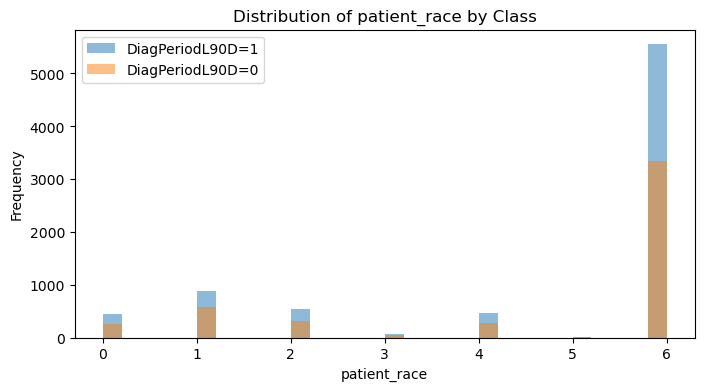

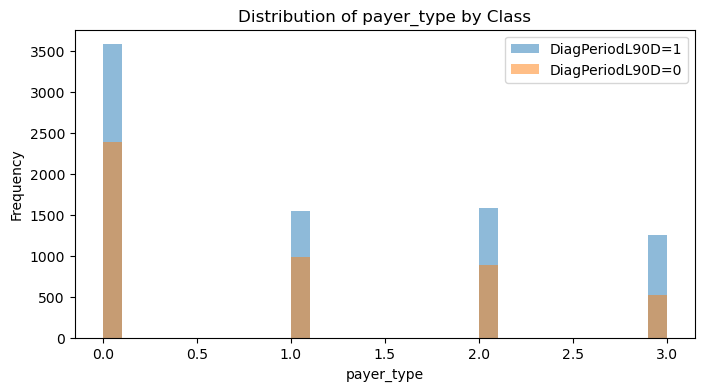

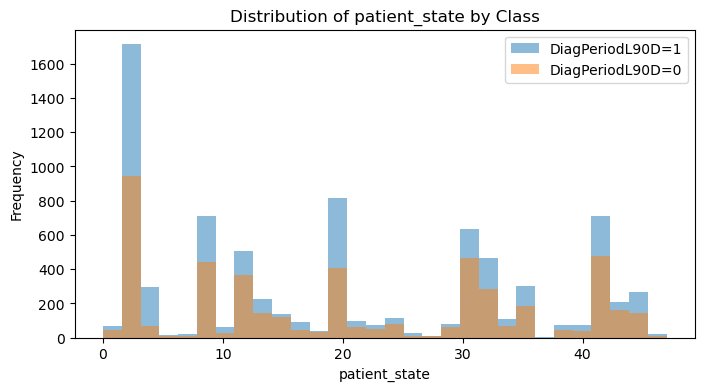

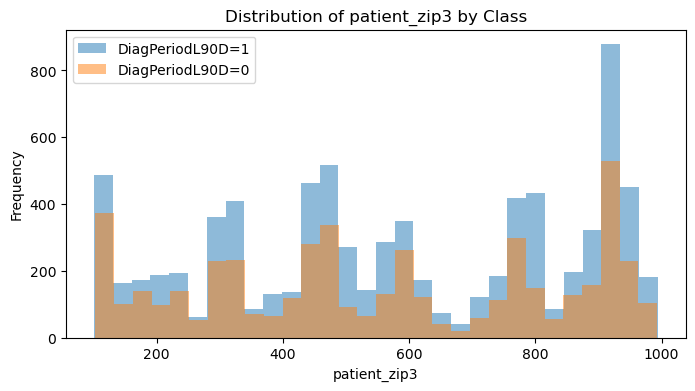

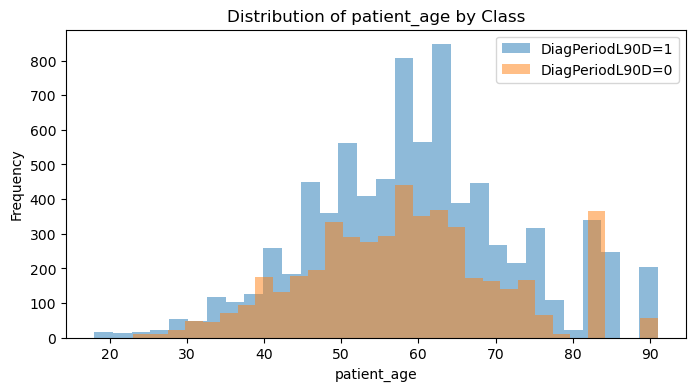

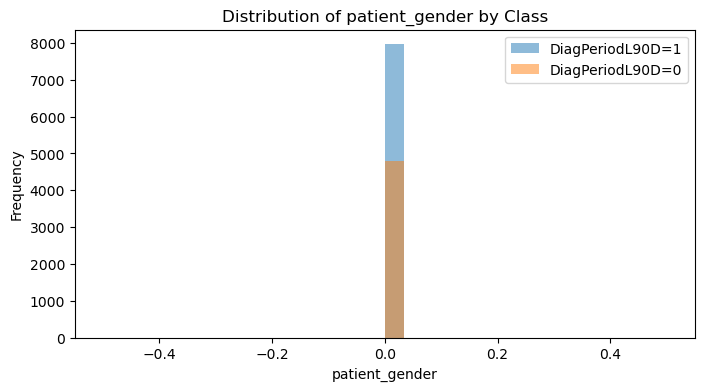

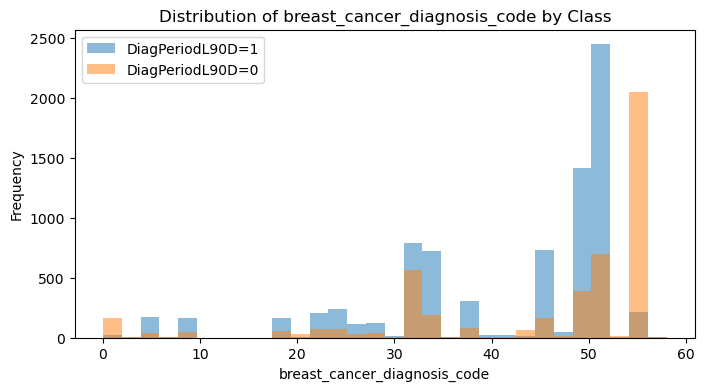

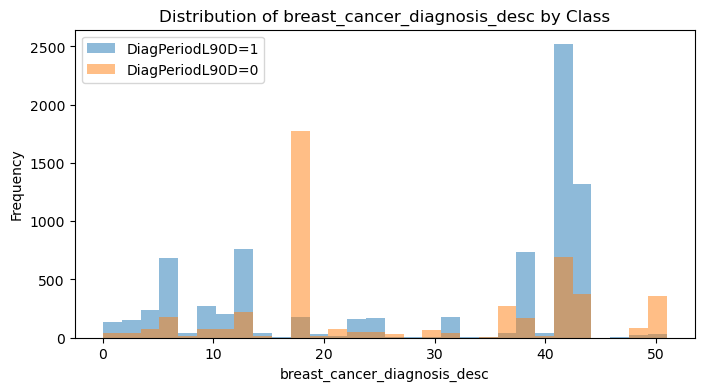

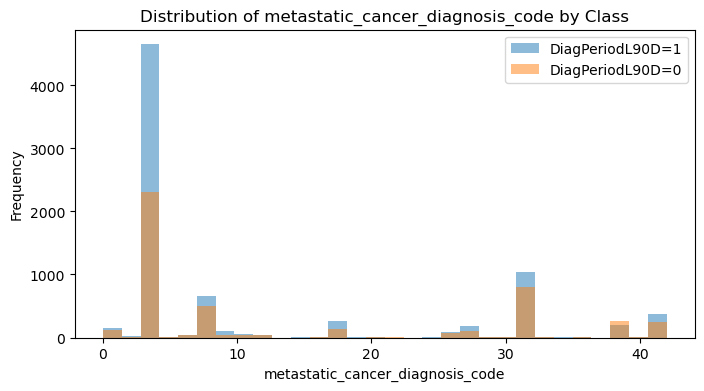

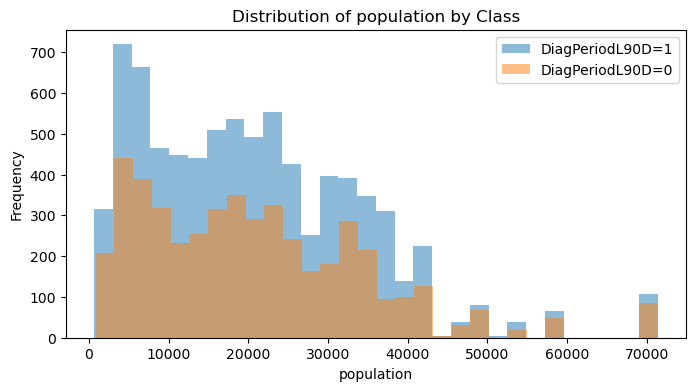

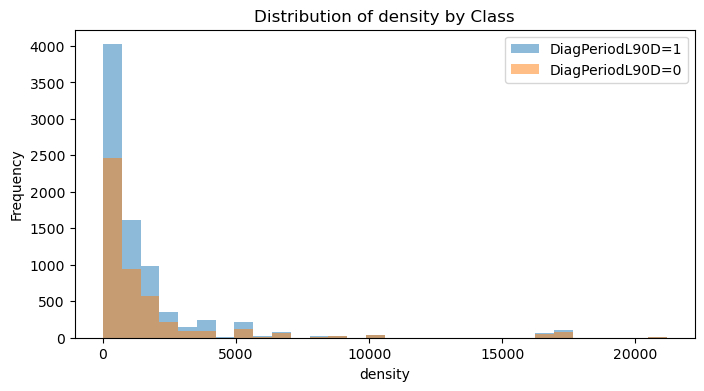

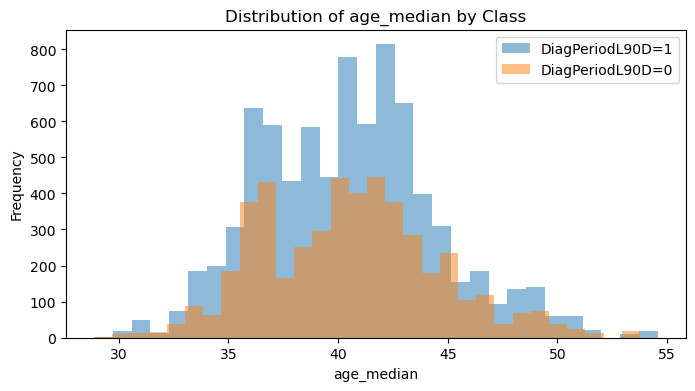

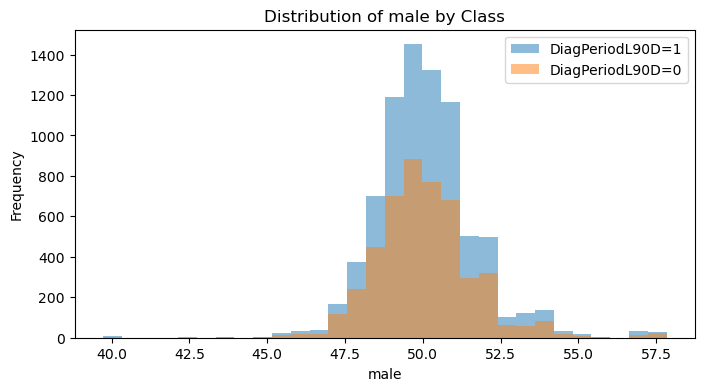

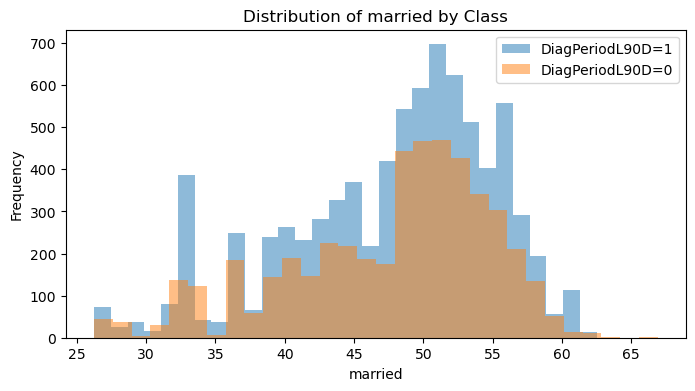

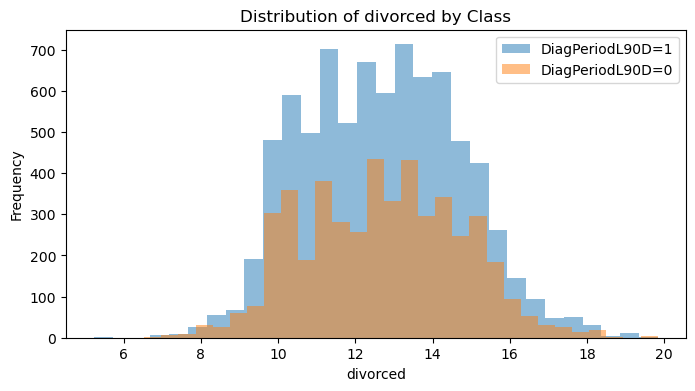

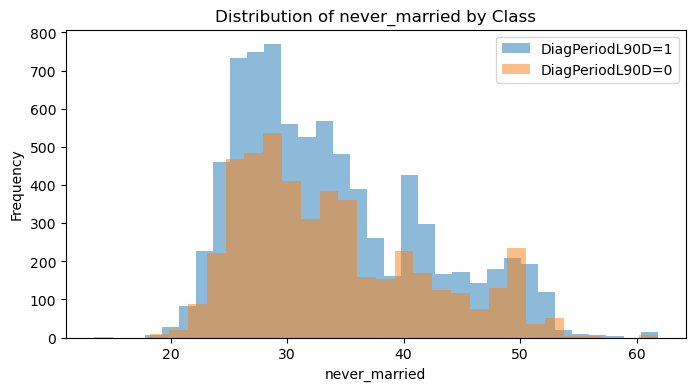

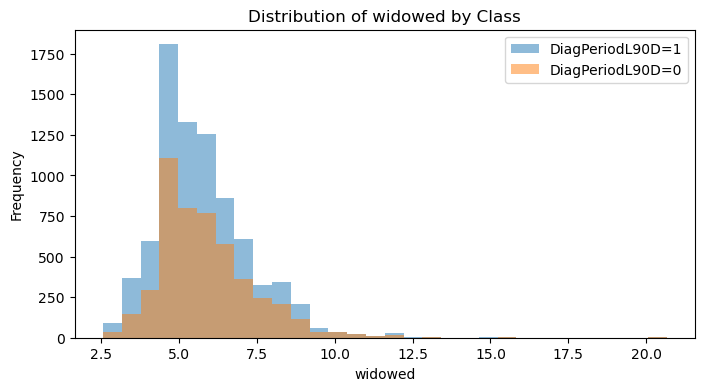

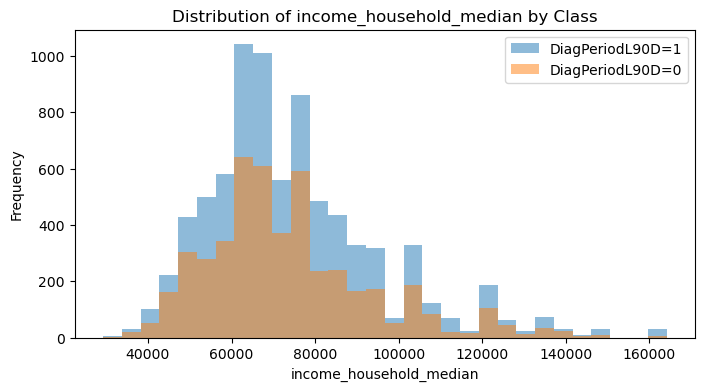

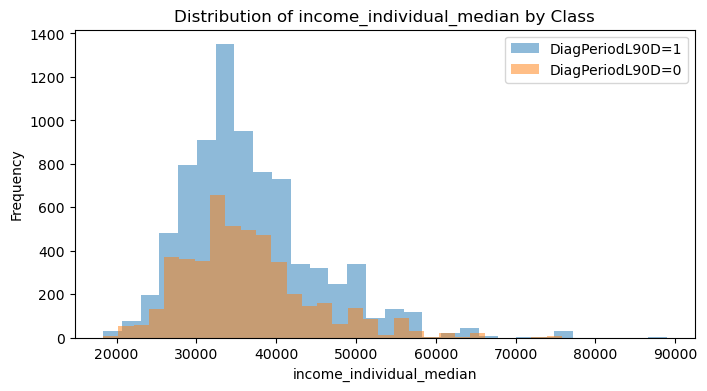

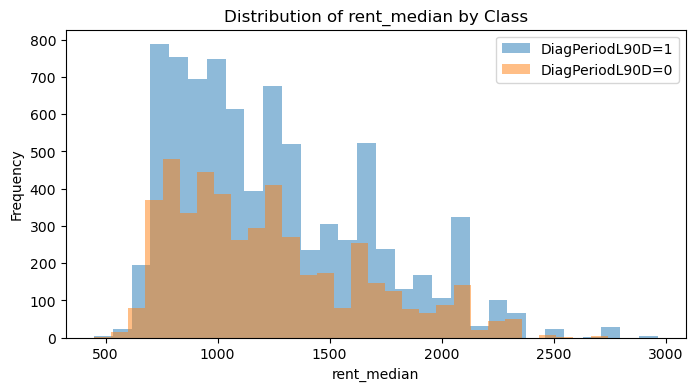

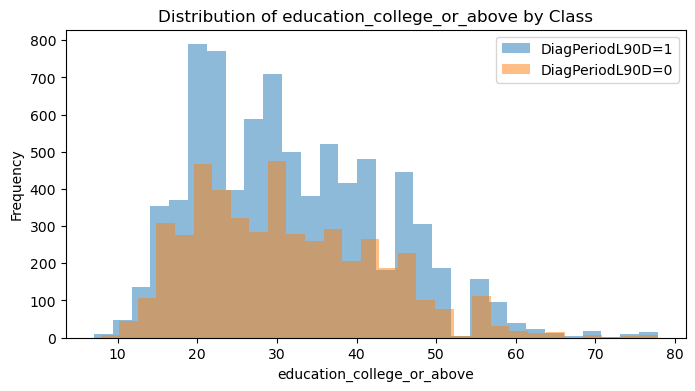

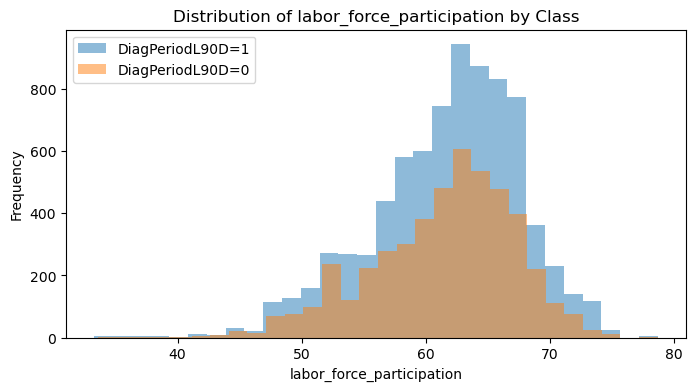

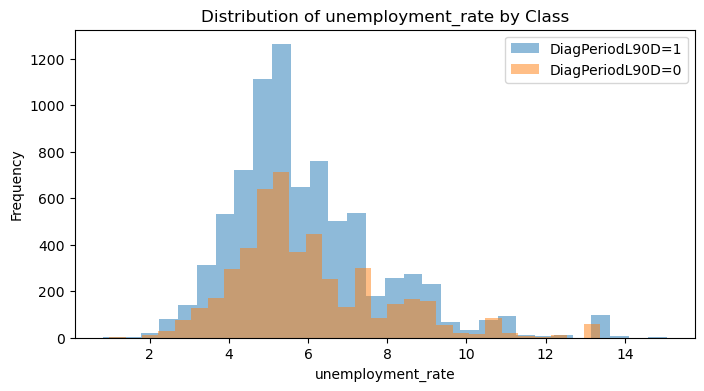

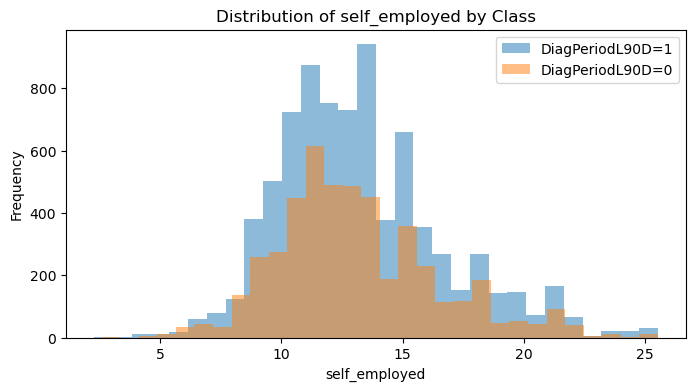

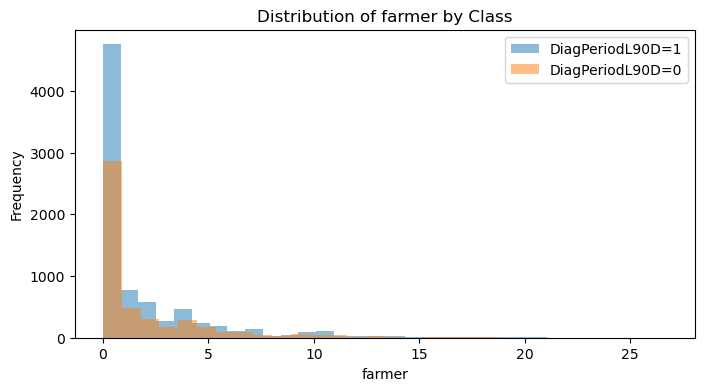

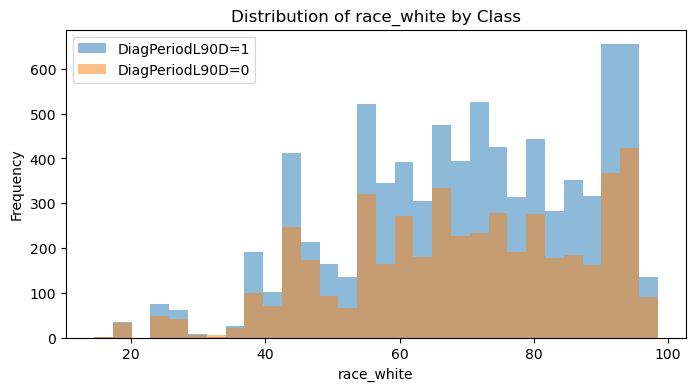

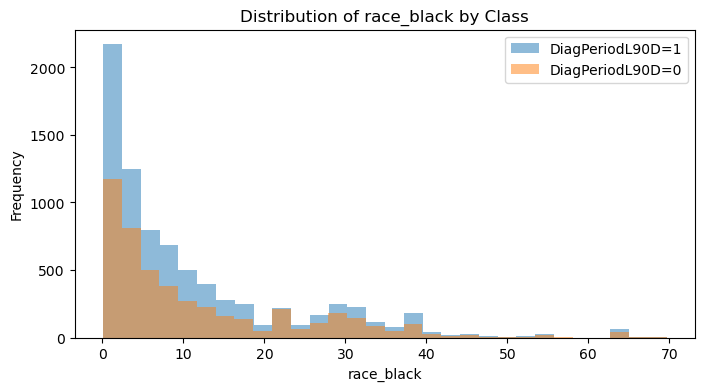

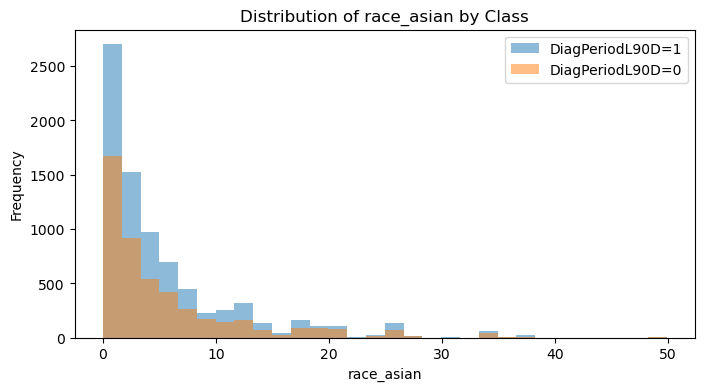

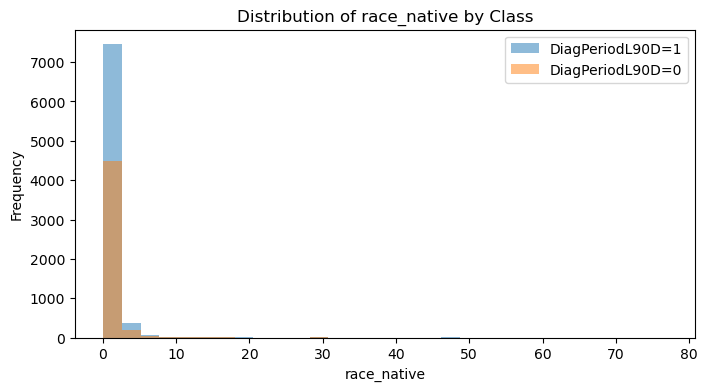

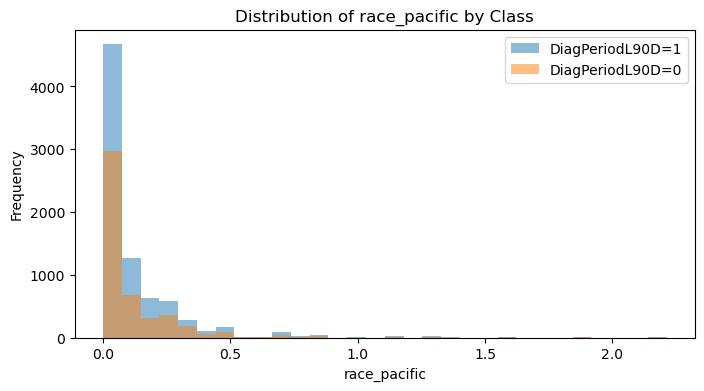

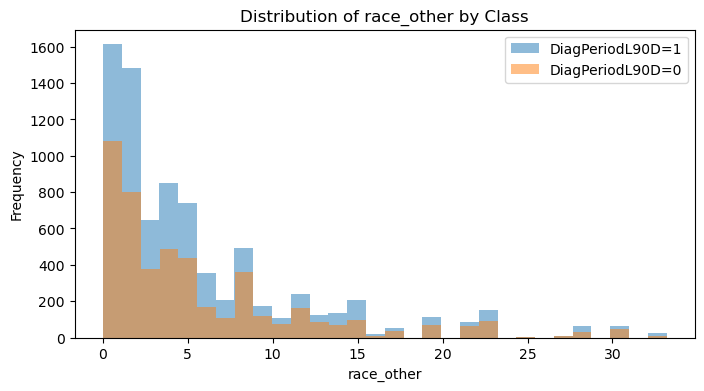

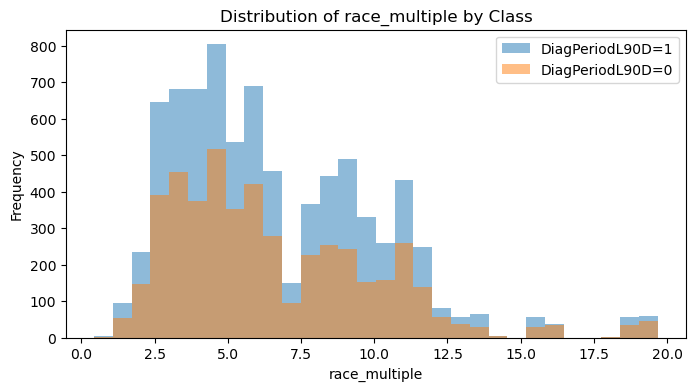

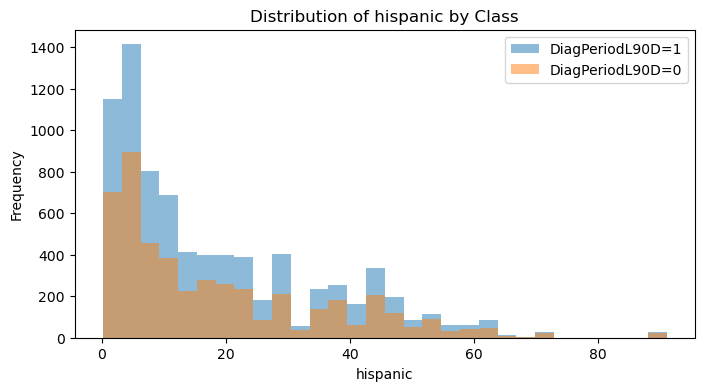

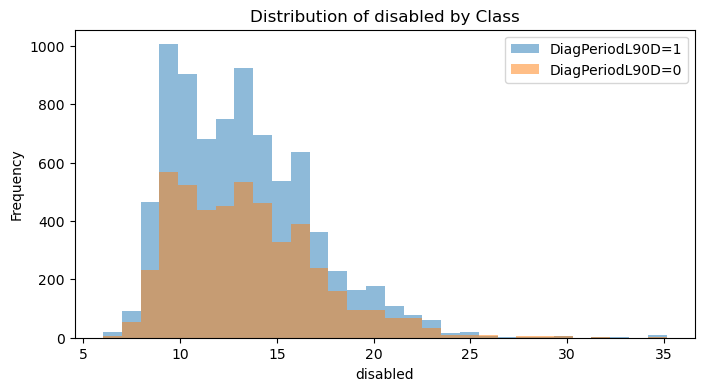

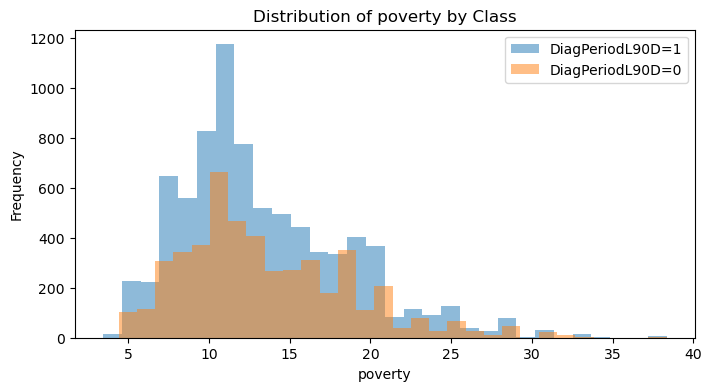

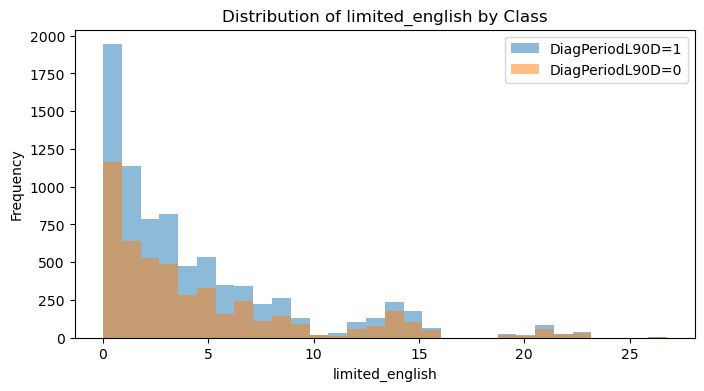

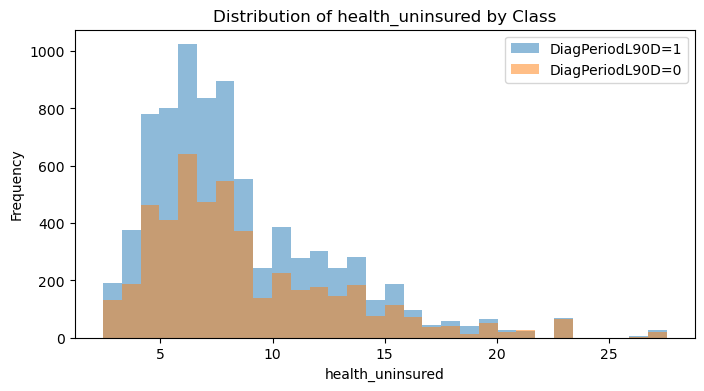

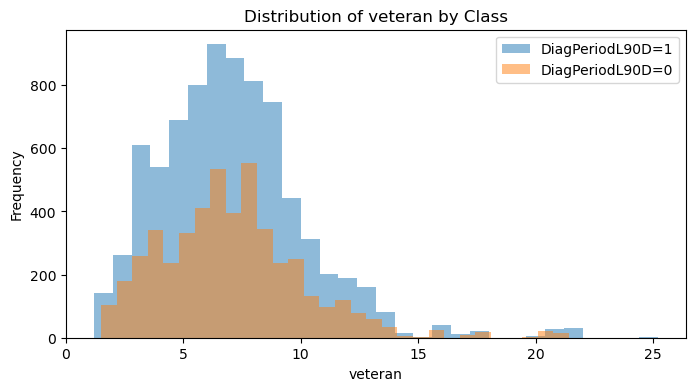

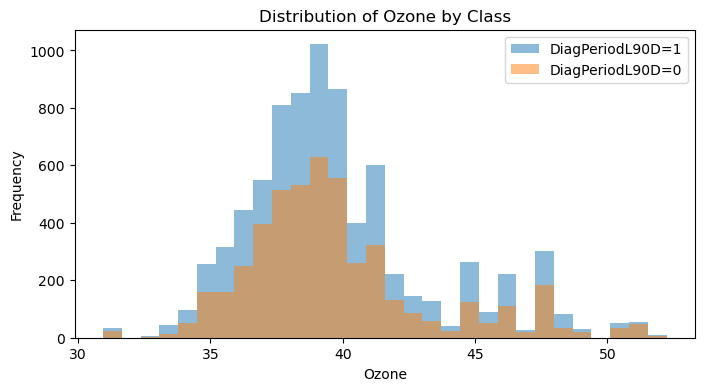

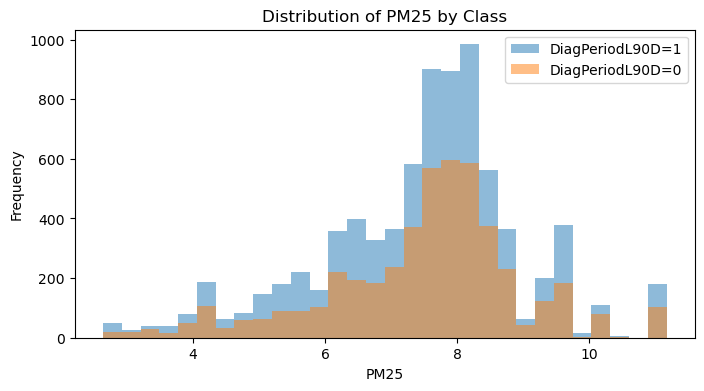

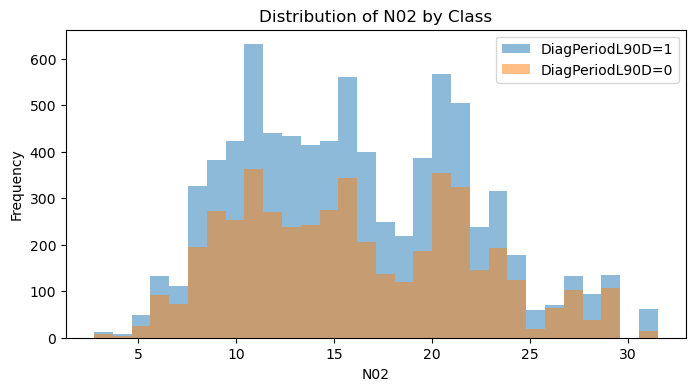

In [83]:
features = df_train.drop(columns=['DiagPeriodL90D'])
target = df_train['DiagPeriodL90D']

# Loop through all features to create histograms
for column in features.columns:
        plt.figure(figsize=(8, 4))
        for label in target.unique():
            subset = features[target == label][column]
            plt.hist(subset, bins=30, alpha=0.5, label=f"DiagPeriodL90D={label}")
        
        plt.title(f"Distribution of {column} by Class")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

In [82]:
for column in features.columns:
    if isinstance(features[column].dtype, pd.CategoricalDtype) or features[column].dtype == 'object':  # Categorical features only
        plt.figure(figsize=(8, 4))
        bar_width = 0.4  
        x_labels = features[column].dropna().unique()  # Unique categories
        
        for i, label in enumerate(target.unique()):  # Loop through classes
            subset = features[target == label][column].value_counts(normalize=True)
            subset = subset.reindex(x_labels, fill_value=0)  
            x_positions = [x + (i * bar_width) for x in range(len(x_labels))]
            
            plt.bar(
                x_positions, 
                subset[x_labels], 
                width=bar_width, 
                label=f"DiagPeriodL90D={label}",
                color=plt.cm.tab10(i / len(target.unique()))  # Distinct colors
            )
        
        plt.title(f"Distribution of {column} by Class")
        plt.xlabel(column)
        plt.ylabel("Proportion")
        plt.xticks([x + bar_width / 2 for x in range(len(x_labels))], x_labels, rotation=45)
        plt.legend()
        plt.show()

BASE MODEL

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

X = df_train.drop(columns=['DiagPeriodL90D'])  # Features
y = df_train['DiagPeriodL90D']                # Target


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Baseline Model
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

#Evaluate
y_pred = baseline_model.predict(X_val)
y_pred_proba = baseline_model.predict_proba(X_val)[:, 1]

# Classification Report
print("Classification Report:")
print(classification_report(y_val, y_pred))

# AUC-ROC Score
auc_score = roc_auc_score(y_val, y_pred_proba)
print(f"AUC-ROC Score: {auc_score}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.55      0.62       937
           1       0.77      0.88      0.82      1614

    accuracy                           0.76      2551
   macro avg       0.75      0.71      0.72      2551
weighted avg       0.75      0.76      0.75      2551

AUC-ROC Score: 0.7557554032948097
Confusion Matrix:
[[ 513  424]
 [ 196 1418]]


In [101]:
X_train.shape

(10203, 41)

                             Feature  Importance
6       breast_cancer_diagnosis_code    0.276723
7       breast_cancer_diagnosis_desc    0.151765
4                        patient_age    0.129543
8   metastatic_cancer_diagnosis_code    0.059641
1                         payer_type    0.039574
0                       patient_race    0.034948
16                           widowed    0.010251
38                             Ozone    0.010041
23                     self_employed    0.010007
12                              male    0.009983


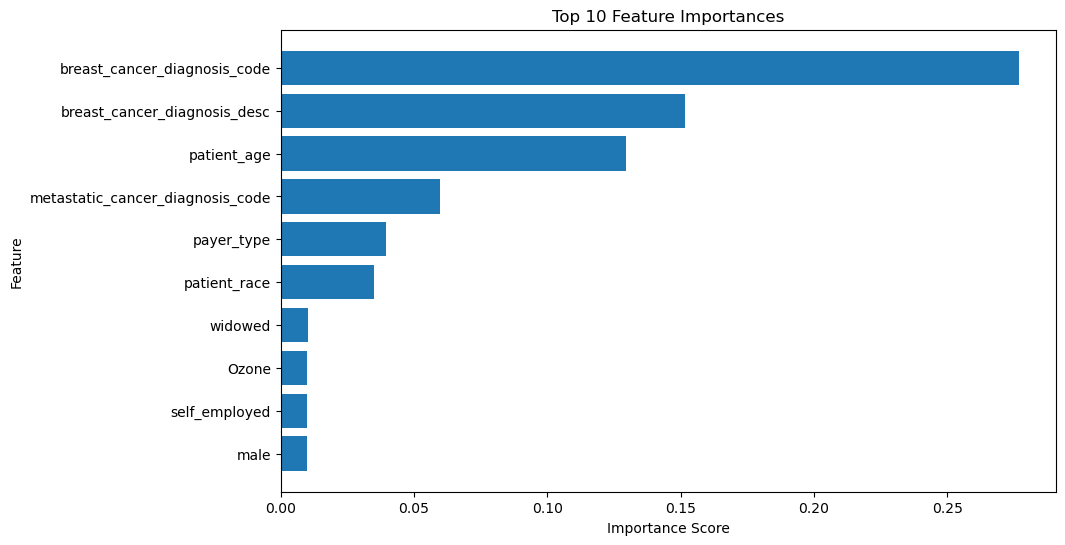

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = baseline_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


print(importance_df.head(10))  # Top 10 features


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


try a few more baseline models, and improve the one with the most meaningful results

In [70]:
from sklearn.linear_model import LogisticRegression
# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_lr = logistic_model.predict(X_val)
y_pred_proba_lr = logistic_model.predict_proba(X_val)[:, 1]

# Evaluation
print("Logistic Regression - Classification Report:")
print(classification_report(y_val, y_pred_lr))

print(f"Logistic Regression - AUC-ROC Score: {roc_auc_score(y_val, y_pred_proba_lr)}")

print("Logistic Regression - Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_lr))


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.26      0.38       937
           1       0.68      0.92      0.78      1614

    accuracy                           0.68      2551
   macro avg       0.67      0.59      0.58      2551
weighted avg       0.67      0.68      0.63      2551

Logistic Regression - AUC-ROC Score: 0.6371669185978082
Logistic Regression - Confusion Matrix:
[[ 247  690]
 [ 127 1487]]


In [75]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_val)
y_pred_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Evaluation
print("\nXGBoost - Classification Report:")
print(classification_report(y_val, y_pred_xgb))

print(f"XGBoost - AUC-ROC Score: {roc_auc_score(y_val, y_pred_proba_xgb)}")

print("XGBoost - Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_xgb))



XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.57      0.65       937
           1       0.78      0.90      0.84      1614

    accuracy                           0.78      2551
   macro avg       0.78      0.74      0.75      2551
weighted avg       0.78      0.78      0.77      2551

XGBoost - AUC-ROC Score: 0.7767308198408007
XGBoost - Confusion Matrix:
[[ 533  404]
 [ 158 1456]]


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [07:49:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1200x800 with 0 Axes>

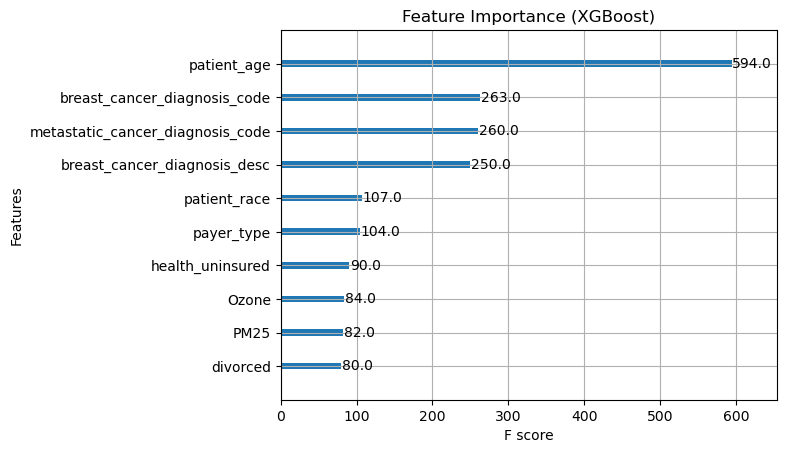

In [76]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(12, 8))
plot_importance(xgb_model, max_num_features=10)  # Top 10 features
plt.title('Feature Importance (XGBoost)')
plt.show()

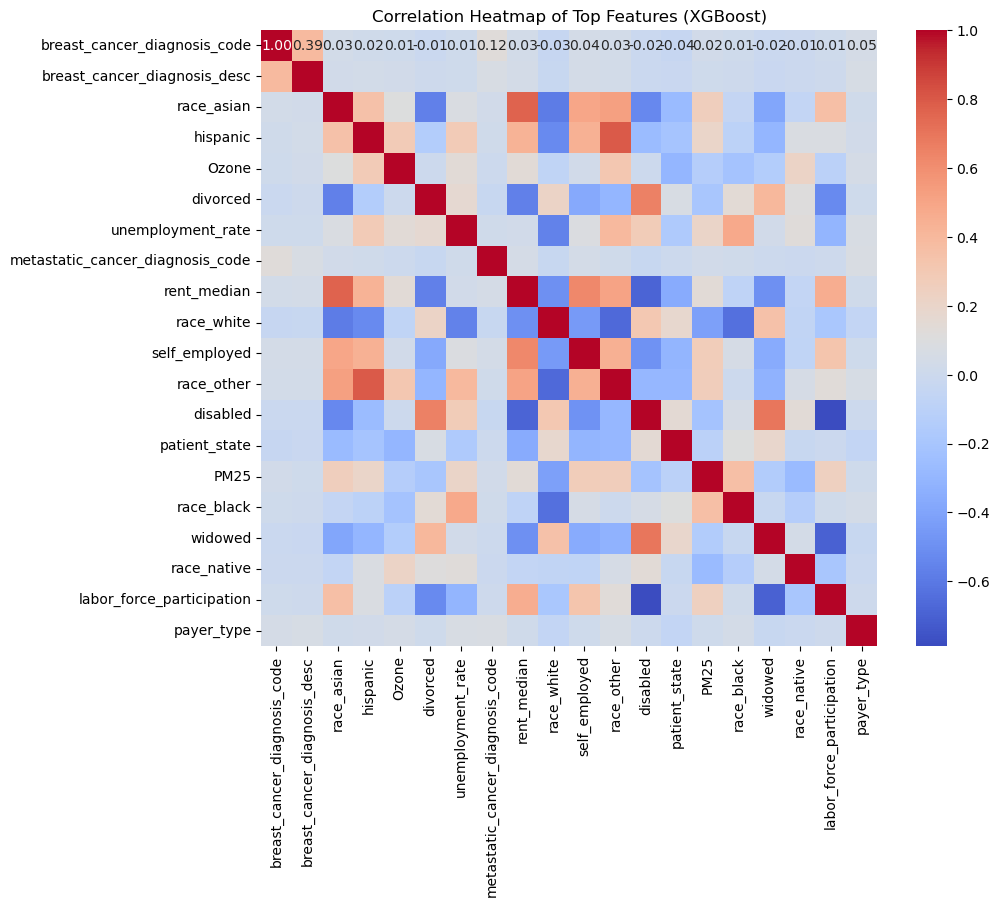

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_features = xgb_importance['Feature'][:20] #adjust as needed

filtered_data = X[top_features]

correlation_matrix = filtered_data.corr()

#Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Heatmap of Top Features (XGBoost)")
plt.show()


based off the baseline models, xgboost is the most promising. with random forest as a close second. one thing noticed is the lower preformance for the 0 class. this is due to class imbalance which should be addressed

there isn't much signs of multicollinearity, so assuming the features are acting independently. some of the 'race' pairs do show some higher correlation

In [86]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Calculate scale_pos_weight
negative_class = sum(y_train == 0)
positive_class = sum(y_train == 1)
scale_pos_weight = negative_class / positive_class

# Train XGBoost with class weight adjustment
xgb_balanced = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    scale_pos_weight=scale_pos_weight, 
    random_state=42
)
xgb_balanced.fit(X_train, y_train)

# Predictions
y_pred_balanced = xgb_balanced.predict(X_val)
y_pred_proba_balanced = xgb_balanced.predict_proba(X_val)[:, 1]

# Evaluation
print("Classification Report:")
print(classification_report(y_val, y_pred_balanced))

print(f"AUC-ROC Score: {roc_auc_score(y_val, y_pred_proba_balanced)}")

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_balanced))


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [08:19:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.61      0.65       937
           1       0.79      0.85      0.82      1614

    accuracy                           0.76      2551
   macro avg       0.75      0.73      0.74      2551
weighted avg       0.76      0.76      0.76      2551

AUC-ROC Score: 0.7729148234696672
Confusion Matrix:
[[ 572  365]
 [ 239 1375]]


In [87]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest on the resampled data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_resampled, y_resampled)

# Predictions
y_pred_rf_smote = rf_smote.predict(X_val)
y_pred_proba_rf_smote = rf_smote.predict_proba(X_val)[:, 1]

# Evaluation
print("Classification Report:")
print(classification_report(y_val, y_pred_rf_smote))

print(f"AUC-ROC Score: {roc_auc_score(y_val, y_pred_proba_rf_smote)}")

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_rf_smote))


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       937
           1       0.77      0.83      0.80      1614

    accuracy                           0.74      2551
   macro avg       0.72      0.71      0.71      2551
weighted avg       0.73      0.74      0.73      2551

AUC-ROC Score: 0.7515175379781235
Confusion Matrix:
[[ 547  390]
 [ 277 1337]]


the class weight adjustment was better across the board. better performance in precision,recall, and F1 scores

In [90]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200, 300],  
    'min_child_weight': [1, 5, 10],  
    'gamma': [0, 0.1, 0.3],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0],  
    'scale_pos_weight': [1, sum(y_train == 0) / sum(y_train == 1)]  
}

# Initialize the XGBoost model
xgb = XGBClassifier(
    eval_metric='logloss',  # Evaluation metric
    random_state=42  # For reproducibility
)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,  
    param_grid=param_grid,  
    scoring='roc_auc',  
    cv=3,  
    verbose=2,  
    n_jobs=-1  
)

# Fit the GridSearchCV object to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 1944 candidates, totalling 5832 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=0.6070247283036698, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, 

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=0.6070247283036698, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=0.6070247283036698, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=300, scale_pos_weight=0.6070247283036698, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1,

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 10, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 1.0}

In [92]:
params = {
    'colsample_bytree': 0.8,
    'gamma': 0,
    'learning_rate': 0.01,
    'max_depth': 7,
    'min_child_weight': 10,
    'n_estimators': 100,
    'scale_pos_weight': 1,
    'subsample': 1.0
}

# Train the final XGBoost model
final_xgb = XGBClassifier(
    **params,
    eval_metric='logloss',  
    random_state=42  
)
final_xgb.fit(X_train, y_train)

# Predict on the validation set
y_pred = final_xgb.predict(X_val)
y_pred_proba = final_xgb.predict_proba(X_val)[:, 1]


In [93]:
# Classification Report
print("Classification Report:")
print(classification_report(y_val, y_pred))

# AUC-ROC Score
auc_roc = roc_auc_score(y_val, y_pred_proba)
print(f"AUC-ROC Score: {auc_roc}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.52      0.65       937
           1       0.78      0.96      0.86      1614

    accuracy                           0.80      2551
   macro avg       0.82      0.74      0.76      2551
weighted avg       0.81      0.80      0.78      2551

AUC-ROC Score: 0.7894616079422448
Confusion Matrix:
[[ 489  448]
 [  70 1544]]
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=0.6070247283036698, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=0.6070247283036698, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.

interesting how the precision skyrocketed for class 0, but the recall actually got worse...

<Figure size 1000x800 with 0 Axes>

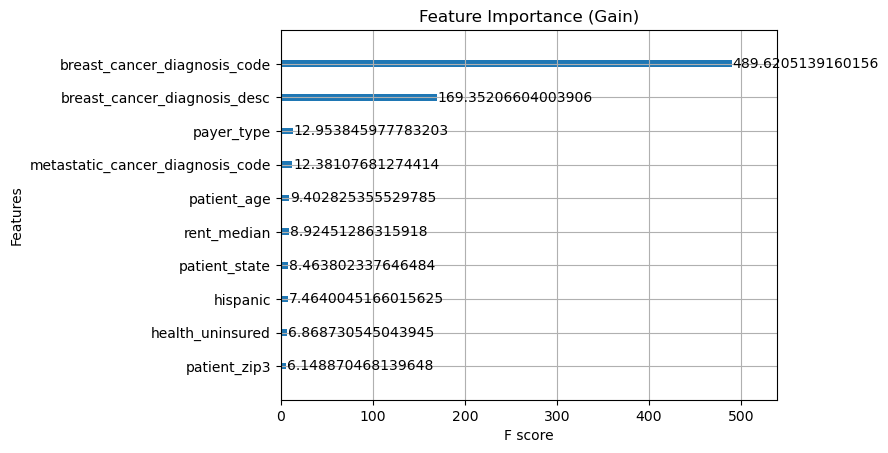

In [94]:
# feature importance based on gain
plt.figure(figsize=(10, 8))
plot_importance(final_xgb, importance_type='gain', max_num_features=10)  # Show top 10 features
plt.title("Feature Importance (Gain)")
plt.show()


the type of diagnosis and payer type seem to be the most important features

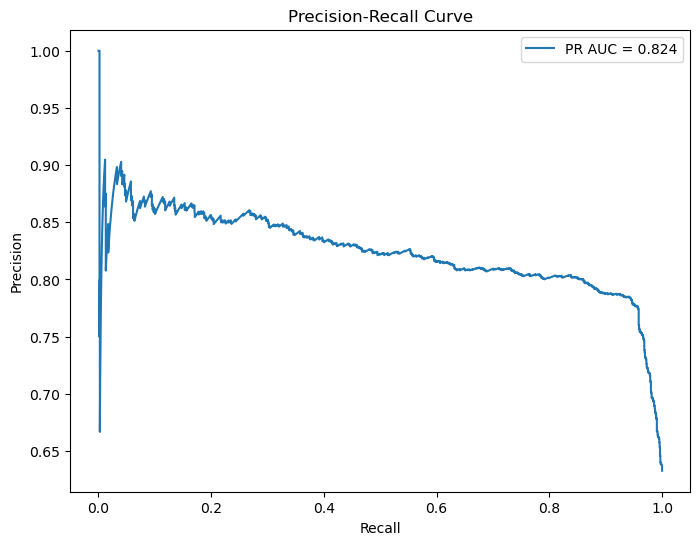

In [100]:
from sklearn.metrics import precision_recall_curve, auc

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)

# Compute the Area Under the Precision-Recall Curve
pr_auc = auc(recall, precision)

# Plot the PR Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()